# 📊 Task 2: Exploratory Data Analysis (EDA)

## Part 1: Overview of the Dataset

### 🎯 **Objective**
Understand the fundamental structure of the Xente transaction dataset to establish a baseline for further analysis. This includes examining dataset dimensions, column types, and initial data quality indicators.

### 🏦 **Business Context for Credit Risk Modeling**
Understanding the data structure helps us:
- Identify available features for risk prediction
- Assess data quality and completeness
- Plan feature engineering strategies
- Determine computational requirements for modeling

### ❓ **Key Questions to Answer:**
1. How many transactions and features do we have?
2. What are the data types of each column?
3. Are there any immediate data quality issues?
4. What is the basic statistical profile of the dataset?

In [4]:
# ============================================
# PART 1: SIMPLE DATA LOADING AND OVERVIEW
# ============================================

import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

print(" Libraries imported successfully!")

# ============================================
# 1. FIND AND LOAD DATA
# ============================================

print("\n" + "="*80)
print("📂 FINDING AND LOADING DATA")
print("="*80)

# Get current directory
current_dir = Path.cwd()
print(f"Current directory: {current_dir}")

# Determine project root
if current_dir.name == 'notebooks':
    project_root = current_dir.parent
else:
    project_root = current_dir

print(f"Project root: {project_root}")

# Define data path
data_path = project_root / 'data' / 'raw' / 'data.csv'
print(f"Data path: {data_path}")

# Check if file exists
if data_path.exists():
    print(f" Found data.csv!")
    print(f"   File size: {data_path.stat().st_size / (1024**2):.2f} MB")
else:
    print(f" data.csv not found at: {data_path}")
    print("\nLooking for data file in other locations...")
    
    # Search for data file
    for path in project_root.rglob('*.csv'):
        if 'data' in path.name.lower():
            print(f"Found CSV file: {path}")
            data_path = path
            break
    else:
        # List files for debugging
        print("\nAvailable files in project:")
        for item in project_root.rglob('*'):
            if item.is_file():
                print(f"  {item.relative_to(project_root)}")
        raise FileNotFoundError("Could not find data.csv file")

 Libraries imported successfully!

📂 FINDING AND LOADING DATA
Current directory: c:\Users\HP\Desktop\KAIM\credit-risk-model\notebooks
Project root: c:\Users\HP\Desktop\KAIM\credit-risk-model
Data path: c:\Users\HP\Desktop\KAIM\credit-risk-model\data\raw\data.csv
 Found data.csv!
   File size: 16.37 MB


In [5]:
# ============================================
# 2. LOAD THE DATASET
# ============================================

print(f"\n📊 Loading dataset...")
try:
    # Load the data
    df = pd.read_csv(data_path)
    print(f" Data loaded successfully!")
    
    # Display basic info
    print(f"\n📈 DATASET INFORMATION:")
    print("-" * 40)
    print(f"Rows (Transactions): {df.shape[0]:,}")
    print(f"Columns (Features):  {df.shape[1]}")
    print(f"Total Cells:         {df.shape[0] * df.shape[1]:,}")
    
    # Memory usage
    memory_mb = df.memory_usage(deep=True).sum() / (1024 ** 2)
    print(f"Memory Usage:        {memory_mb:.2f} MB")
    
except Exception as e:
    print(f"❌ Error loading data: {e}")
    
    # Try loading with different parameters
    print("\n⚠️  Trying alternative loading methods...")
    try:
        # Try with low_memory=False
        df = pd.read_csv(data_path, low_memory=False)
        print(f" Loaded with low_memory=False")
    except Exception as e2:
        print(f"❌ Still failed: {e2}")
        raise



📊 Loading dataset...
 Data loaded successfully!

📈 DATASET INFORMATION:
----------------------------------------
Rows (Transactions): 95,662
Columns (Features):  16
Total Cells:         1,530,592
Memory Usage:        66.48 MB


In [6]:
# ============================================
# 3. DISPLAY BASIC INFORMATION
# ============================================

print("\n" + "="*80)
print("📋 BASIC DATASET INFORMATION")
print("="*80)

# Display column info
print(f"\n🔍 COLUMNS ({len(df.columns)} total):")
print("-" * 40)
for i, col in enumerate(df.columns, 1):
    dtype = df[col].dtype
    non_null = df[col].notna().sum()
    null_pct = (df[col].isna().sum() / len(df)) * 100
    unique = df[col].nunique()
    print(f"{i:2}. {col:<25} | {str(dtype):<10} | {non_null:>8,} non-null | {null_pct:>5.1f}% null | {unique:>6,} unique")

# Data type summary
print(f"\n📊 DATA TYPE SUMMARY:")
print("-" * 40)
dtype_counts = df.dtypes.value_counts()
for dtype, count in dtype_counts.items():
    print(f"{str(dtype):<20}: {count:>3} columns ({count/len(df.columns)*100:.1f}%)")


📋 BASIC DATASET INFORMATION

🔍 COLUMNS (16 total):
----------------------------------------
 1. TransactionId             | object     |   95,662 non-null |   0.0% null | 95,662 unique
 2. BatchId                   | object     |   95,662 non-null |   0.0% null | 94,809 unique
 3. AccountId                 | object     |   95,662 non-null |   0.0% null |  3,633 unique
 4. SubscriptionId            | object     |   95,662 non-null |   0.0% null |  3,627 unique
 5. CustomerId                | object     |   95,662 non-null |   0.0% null |  3,742 unique
 6. CurrencyCode              | object     |   95,662 non-null |   0.0% null |      1 unique
 7. CountryCode               | int64      |   95,662 non-null |   0.0% null |      1 unique
 8. ProviderId                | object     |   95,662 non-null |   0.0% null |      6 unique
 9. ProductId                 | object     |   95,662 non-null |   0.0% null |     23 unique
10. ProductCategory           | object     |   95,662 non-null |   0.0

In [7]:
# ============================================
# 4. DATA PREVIEW
# ============================================

print("\n" + "="*80)
print("👀 DATA PREVIEW")
print("="*80)

print(f"\nFirst 3 rows:")
print("-" * 80)
print(df.head(3))

print(f"\nLast 3 rows:")
print("-" * 80)
print(df.tail(3))

print(f"\nRandom sample of 3 rows:")
print("-" * 80)
print(df.sample(3, random_state=42))



👀 DATA PREVIEW

First 3 rows:
--------------------------------------------------------------------------------
         TransactionId        BatchId       AccountId       SubscriptionId  \
0  TransactionId_76871  BatchId_36123  AccountId_3957   SubscriptionId_887   
1  TransactionId_73770  BatchId_15642  AccountId_4841  SubscriptionId_3829   
2  TransactionId_26203  BatchId_53941  AccountId_4229   SubscriptionId_222   

        CustomerId CurrencyCode  CountryCode    ProviderId     ProductId  \
0  CustomerId_4406          UGX          256  ProviderId_6  ProductId_10   
1  CustomerId_4406          UGX          256  ProviderId_4   ProductId_6   
2  CustomerId_4683          UGX          256  ProviderId_6   ProductId_1   

      ProductCategory    ChannelId  Amount  Value  TransactionStartTime  \
0             airtime  ChannelId_3  1000.0   1000  2018-11-15T02:18:49Z   
1  financial_services  ChannelId_2   -20.0     20  2018-11-15T02:19:08Z   
2             airtime  ChannelId_3   500.0   

In [8]:
# ============================================
# 5. CHECK FOR DUPLICATES
# ============================================

print("\n" + "="*80)
print("🔍 DUPLICATE ANALYSIS")
print("="*80)

duplicates = df.duplicated().sum()
duplicate_pct = (duplicates / len(df)) * 100

print(f"\nDuplicate rows: {duplicates:,} ({duplicate_pct:.4f}%)")

if duplicates > 0:
    print(f"\n📄 Sample of duplicate rows (first 3):")
    print("-" * 60)
    dup_rows = df[df.duplicated(keep=False)]
    print(dup_rows.head(3))
else:
    print(" No duplicate rows found")


🔍 DUPLICATE ANALYSIS

Duplicate rows: 0 (0.0000%)
 No duplicate rows found


In [9]:
# ============================================
# 6. CHECK FOR MISSING VALUES
# ============================================

print("\n" + "="*80)
print("⚠️  MISSING VALUES ANALYSIS")
print("="*80)

# Calculate missing values
missing_series = df.isnull().sum()
missing_series = missing_series[missing_series > 0]

if len(missing_series) > 0:
    print(f"\nColumns with missing values ({len(missing_series)}):")
    print("-" * 60)
    
    missing_data = []
    for col, count in missing_series.items():
        pct = (count / len(df)) * 100
        missing_data.append({
            'Column': col,
            'Missing Count': f"{count:,}",
            'Missing %': f"{pct:.2f}%",
            'Data Type': str(df[col].dtype)
        })
    
    missing_df = pd.DataFrame(missing_data)
    print(missing_df.to_string(index=False))
    
    # Visualize missing values
    print(f"\n📊 Visualizing missing values...")
    plt.figure(figsize=(10, 6))
    missing_pct = (df.isnull().sum() / len(df) * 100)
    missing_pct = missing_pct[missing_pct > 0].sort_values(ascending=False)
    
    bars = plt.barh(missing_pct.index, missing_pct.values)
    plt.xlabel('Missing Percentage (%)')
    plt.title('Missing Values by Column')
    plt.gca().invert_yaxis()
    
    # Add labels
    for bar, pct in zip(bars, missing_pct.values):
        plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height()/2,
                f'{pct:.1f}%', va='center')
    
    plt.tight_layout()
    plt.show()
    
else:
    print(" No missing values found in any columns!")


⚠️  MISSING VALUES ANALYSIS
 No missing values found in any columns!


In [11]:
# ============================================
# 7. INITIAL INSIGHTS
# ============================================

print("\n" + "="*80)
print("💡 INITIAL INSIGHTS FOR CREDIT RISK MODELING")
print("="*80)

print(f"\n1️⃣ **DATASET SCALE & QUALITY**:")
print(f"   • {df.shape[0]:,} transactions - Good volume for modeling")
print(f"   • {df.shape[1]} features - Sufficient for feature engineering")
print(f"   • {duplicates:,} duplicates ({duplicate_pct:.4f}%) - {'Needs cleaning' if duplicates > 0 else 'Clean'}")
print(f"   • {len(missing_series)} columns with missing values - {'Needs treatment' if len(missing_series) > 0 else 'Clean'}")

print(f"\n2️⃣ **KEY FEATURES IDENTIFIED**:")
key_features = ['CustomerId', 'Amount', 'TransactionStartTime', 'FraudResult', 'ProductCategory']
for feat in key_features:
    if feat in df.columns:
        dtype = df[feat].dtype
        null_pct = (df[feat].isnull().sum() / len(df)) * 100
        unique = df[feat].nunique()
        print(f"   • {feat:<25} [{str(dtype):<10}] - {null_pct:>5.1f}% null, {unique:>6,} unique")

if 'Amount' in df.columns:
    print(f"\n3️⃣ **TRANSACTION AMOUNTS**:")
    print(f"   • Range: {df['Amount'].min():,.2f} to {df['Amount'].max():,.2f}")
    print(f"   • Mean: {df['Amount'].mean():,.2f}")
    print(f"   • Median: {df['Amount'].median():,.2f}")
    print(f"   • Std Dev: {df['Amount'].std():,.2f}")



💡 INITIAL INSIGHTS FOR CREDIT RISK MODELING

1️⃣ **DATASET SCALE & QUALITY**:
   • 95,662 transactions - Good volume for modeling
   • 16 features - Sufficient for feature engineering
   • 0 duplicates (0.0000%) - Clean
   • 0 columns with missing values - Clean

2️⃣ **KEY FEATURES IDENTIFIED**:
   • CustomerId                [object    ] -   0.0% null,  3,742 unique
   • Amount                    [float64   ] -   0.0% null,  1,676 unique
   • TransactionStartTime      [object    ] -   0.0% null, 94,556 unique
   • FraudResult               [int64     ] -   0.0% null,      2 unique
   • ProductCategory           [object    ] -   0.0% null,      9 unique

3️⃣ **TRANSACTION AMOUNTS**:
   • Range: -1,000,000.00 to 9,880,000.00
   • Mean: 6,717.85
   • Median: 1,000.00
   • Std Dev: 123,306.80


In [14]:
# ============================================
# 2. CREATE STATISTICAL SUMMARY FUNCTION
# ============================================

# Identify numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print(f"\n📊 Column Type Summary:")
print(f"• Numerical columns: {len(numerical_cols)}")
print(f"• Categorical columns: {len(categorical_cols)}")

def create_statistical_summary(df, numerical_cols):
    """
    Create comprehensive statistical summary for numerical columns
    
    Parameters:
    -----------
    df : pandas DataFrame
    numerical_cols : list of numerical column names
    
    Returns:
    --------
    pandas DataFrame with statistical summary
    """
    
    stats_data = []
    
    for col in numerical_cols:
        # Basic statistics
        col_data = df[col].dropna()
        n = len(col_data)
        
        # Skip if empty or constant
        if n == 0 or col_data.nunique() == 1:
            continue
            
        stats_dict = {
            'Feature': col,
            'Count': n,
            'Missing': df[col].isnull().sum(),
            'Missing %': (df[col].isnull().sum() / len(df)) * 100,
            
            # Central Tendency
            'Mean': col_data.mean(),
            'Median': col_data.median(),
            'Mode': col_data.mode().iloc[0] if not col_data.mode().empty else np.nan,
            
            # Dispersion
            'Std': col_data.std(),
            'Variance': col_data.var(),
            'Min': col_data.min(),
            'Max': col_data.max(),
            'Range': col_data.max() - col_data.min(),
            'Q1': col_data.quantile(0.25),
            'Q3': col_data.quantile(0.75),
            'IQR': col_data.quantile(0.75) - col_data.quantile(0.25),
            
            # Shape
            'Skewness': col_data.skew(),
            'Kurtosis': col_data.kurtosis(),
            
            # Key Percentiles
            'P10': col_data.quantile(0.10),
            'P25': col_data.quantile(0.25),
            'P50': col_data.quantile(0.50),
            'P75': col_data.quantile(0.75),
            'P90': col_data.quantile(0.90),
            'P95': col_data.quantile(0.95),
            'P99': col_data.quantile(0.99),
            
            # Special statistics for financial data
            'Sum': col_data.sum(),
            'Zero Count': (col_data == 0).sum(),
            'Zero %': ((col_data == 0).sum() / n) * 100,
            'Negative Count': (col_data < 0).sum(),
            'Negative %': ((col_data < 0).sum() / n) * 100
        }
        
        # Add coefficient of variation (if mean != 0)
        if stats_dict['Mean'] != 0:
            stats_dict['CV %'] = (stats_dict['Std'] / abs(stats_dict['Mean'])) * 100
        else:
            stats_dict['CV %'] = np.nan
            
        stats_data.append(stats_dict)
    
    return pd.DataFrame(stats_data)


📊 Column Type Summary:
• Numerical columns: 5
• Categorical columns: 11


In [15]:
# ============================================
# 3. GENERATE STATISTICAL SUMMARY
# ============================================

print("\n" + "="*80)
print("📊 COMPREHENSIVE STATISTICAL SUMMARY")
print("="*80)

# Generate summary
stats_df = create_statistical_summary(df, numerical_cols)

print(f"\n📈 STATISTICS FOR {len(stats_df)} NUMERICAL FEATURES:")
print("="*100)

# Display formatted summary
display_cols = ['Feature', 'Count', 'Missing %', 'Mean', 'Median', 'Std', 'Min', 'Max', 
                'IQR', 'Skewness', 'Kurtosis', 'CV %']

formatted_stats = stats_df[display_cols].copy()

# Format numeric columns
for col in ['Mean', 'Median', 'Std', 'Min', 'Max', 'IQR', 'CV %']:
    if col in formatted_stats.columns:
        if col == 'CV %':
            formatted_stats[col] = formatted_stats[col].apply(lambda x: f"{x:.1f}%" if pd.notnull(x) else "N/A")
        else:
            formatted_stats[col] = formatted_stats[col].apply(lambda x: f"{x:,.2f}" if pd.notnull(x) else "N/A")

# Format skewness and kurtosis
formatted_stats['Skewness'] = formatted_stats['Skewness'].apply(lambda x: f"{x:.2f}")
formatted_stats['Kurtosis'] = formatted_stats['Kurtosis'].apply(lambda x: f"{x:.2f}")

# Format missing percentage
formatted_stats['Missing %'] = formatted_stats['Missing %'].apply(lambda x: f"{x:.2f}%")

print(formatted_stats.to_string(index=False))


📊 COMPREHENSIVE STATISTICAL SUMMARY

📈 STATISTICS FOR 4 NUMERICAL FEATURES:
        Feature  Count Missing %     Mean   Median        Std           Min          Max      IQR Skewness Kurtosis    CV %
         Amount  95662     0.00% 6,717.85 1,000.00 123,306.80 -1,000,000.00 9,880,000.00 2,850.00    51.10  3363.13 1835.5%
          Value  95662     0.00% 9,900.58 1,000.00 123,122.09          2.00 9,880,000.00 4,725.00    51.29  3378.07 1243.6%
PricingStrategy  95662     0.00%     2.26     2.00       0.73          0.00         4.00     0.00     1.66     2.09   32.5%
    FraudResult  95662     0.00%     0.00     0.00       0.04          0.00         1.00     0.00    22.20   490.69 2224.1%


In [16]:
# Analyze key features
print(f"\n🔍 ANALYSIS OF KEY FEATURES:")
print("-" * 80)

key_features_to_analyze = ['Amount', 'Value', 'FraudResult'] if 'FraudResult' in numerical_cols else ['Amount', 'Value']

for feature in key_features_to_analyze:
    if feature in stats_df['Feature'].values:
        feat_stats = stats_df[stats_df['Feature'] == feature].iloc[0]
        
        print(f"\n📌 **{feature}**:")
        print(f"   • Mean: {feat_stats['Mean']:,.2f} vs Median: {feat_stats['Median']:,.2f}")
        
        # Skewness interpretation
        skew_val = feat_stats['Skewness']
        if abs(skew_val) > 1:
            skew_type = "Highly skewed" 
        elif abs(skew_val) > 0.5:
            skew_type = "Moderately skewed"
        else:
            skew_type = "Approximately symmetric"
            
        skew_direction = "right" if skew_val > 0 else "left" if skew_val < 0 else "symmetric"
        print(f"   • Skewness: {skew_val:.2f} ({skew_type} to the {skew_direction})")
        
        # Kurtosis interpretation
        kurt_val = feat_stats['Kurtosis']
        if kurt_val > 3:
            kurt_type = "Heavy-tailed (more outliers than normal)"
        elif kurt_val < 3:
            kurt_type = "Light-tailed (fewer outliers than normal)"
        else:
            kurt_type = "Normal tail behavior"
        print(f"   • Kurtosis: {kurt_val:.2f} ({kurt_type})")
        
        # CV interpretation
        if pd.notnull(feat_stats['CV %']):
            cv_val = feat_stats['CV %']
            if cv_val < 15:
                cv_type = "Low variability"
            elif cv_val < 30:
                cv_type = "Moderate variability"
            else:
                cv_type = "High variability"
            print(f"   • CV: {cv_val:.1f}% ({cv_type})")
        
        # IQR vs Range comparison
        iqr_ratio = feat_stats['IQR'] / feat_stats['Range'] if feat_stats['Range'] != 0 else 0
        print(f"   • IQR/Range ratio: {iqr_ratio:.2f} (Lower = more extreme values)")


🔍 ANALYSIS OF KEY FEATURES:
--------------------------------------------------------------------------------

📌 **Amount**:
   • Mean: 6,717.85 vs Median: 1,000.00
   • Skewness: 51.10 (Highly skewed to the right)
   • Kurtosis: 3363.13 (Heavy-tailed (more outliers than normal))
   • CV: 1835.5% (High variability)
   • IQR/Range ratio: 0.00 (Lower = more extreme values)

📌 **Value**:
   • Mean: 9,900.58 vs Median: 1,000.00
   • Skewness: 51.29 (Highly skewed to the right)
   • Kurtosis: 3378.07 (Heavy-tailed (more outliers than normal))
   • CV: 1243.6% (High variability)
   • IQR/Range ratio: 0.00 (Lower = more extreme values)

📌 **FraudResult**:
   • Mean: 0.00 vs Median: 0.00
   • Skewness: 22.20 (Highly skewed to the right)
   • Kurtosis: 490.69 (Heavy-tailed (more outliers than normal))
   • CV: 2224.1% (High variability)
   • IQR/Range ratio: 0.00 (Lower = more extreme values)



📊 VISUALIZING DISTRIBUTION STATISTICS

📈 Visualizing distributions for: Amount, Value, FraudResult


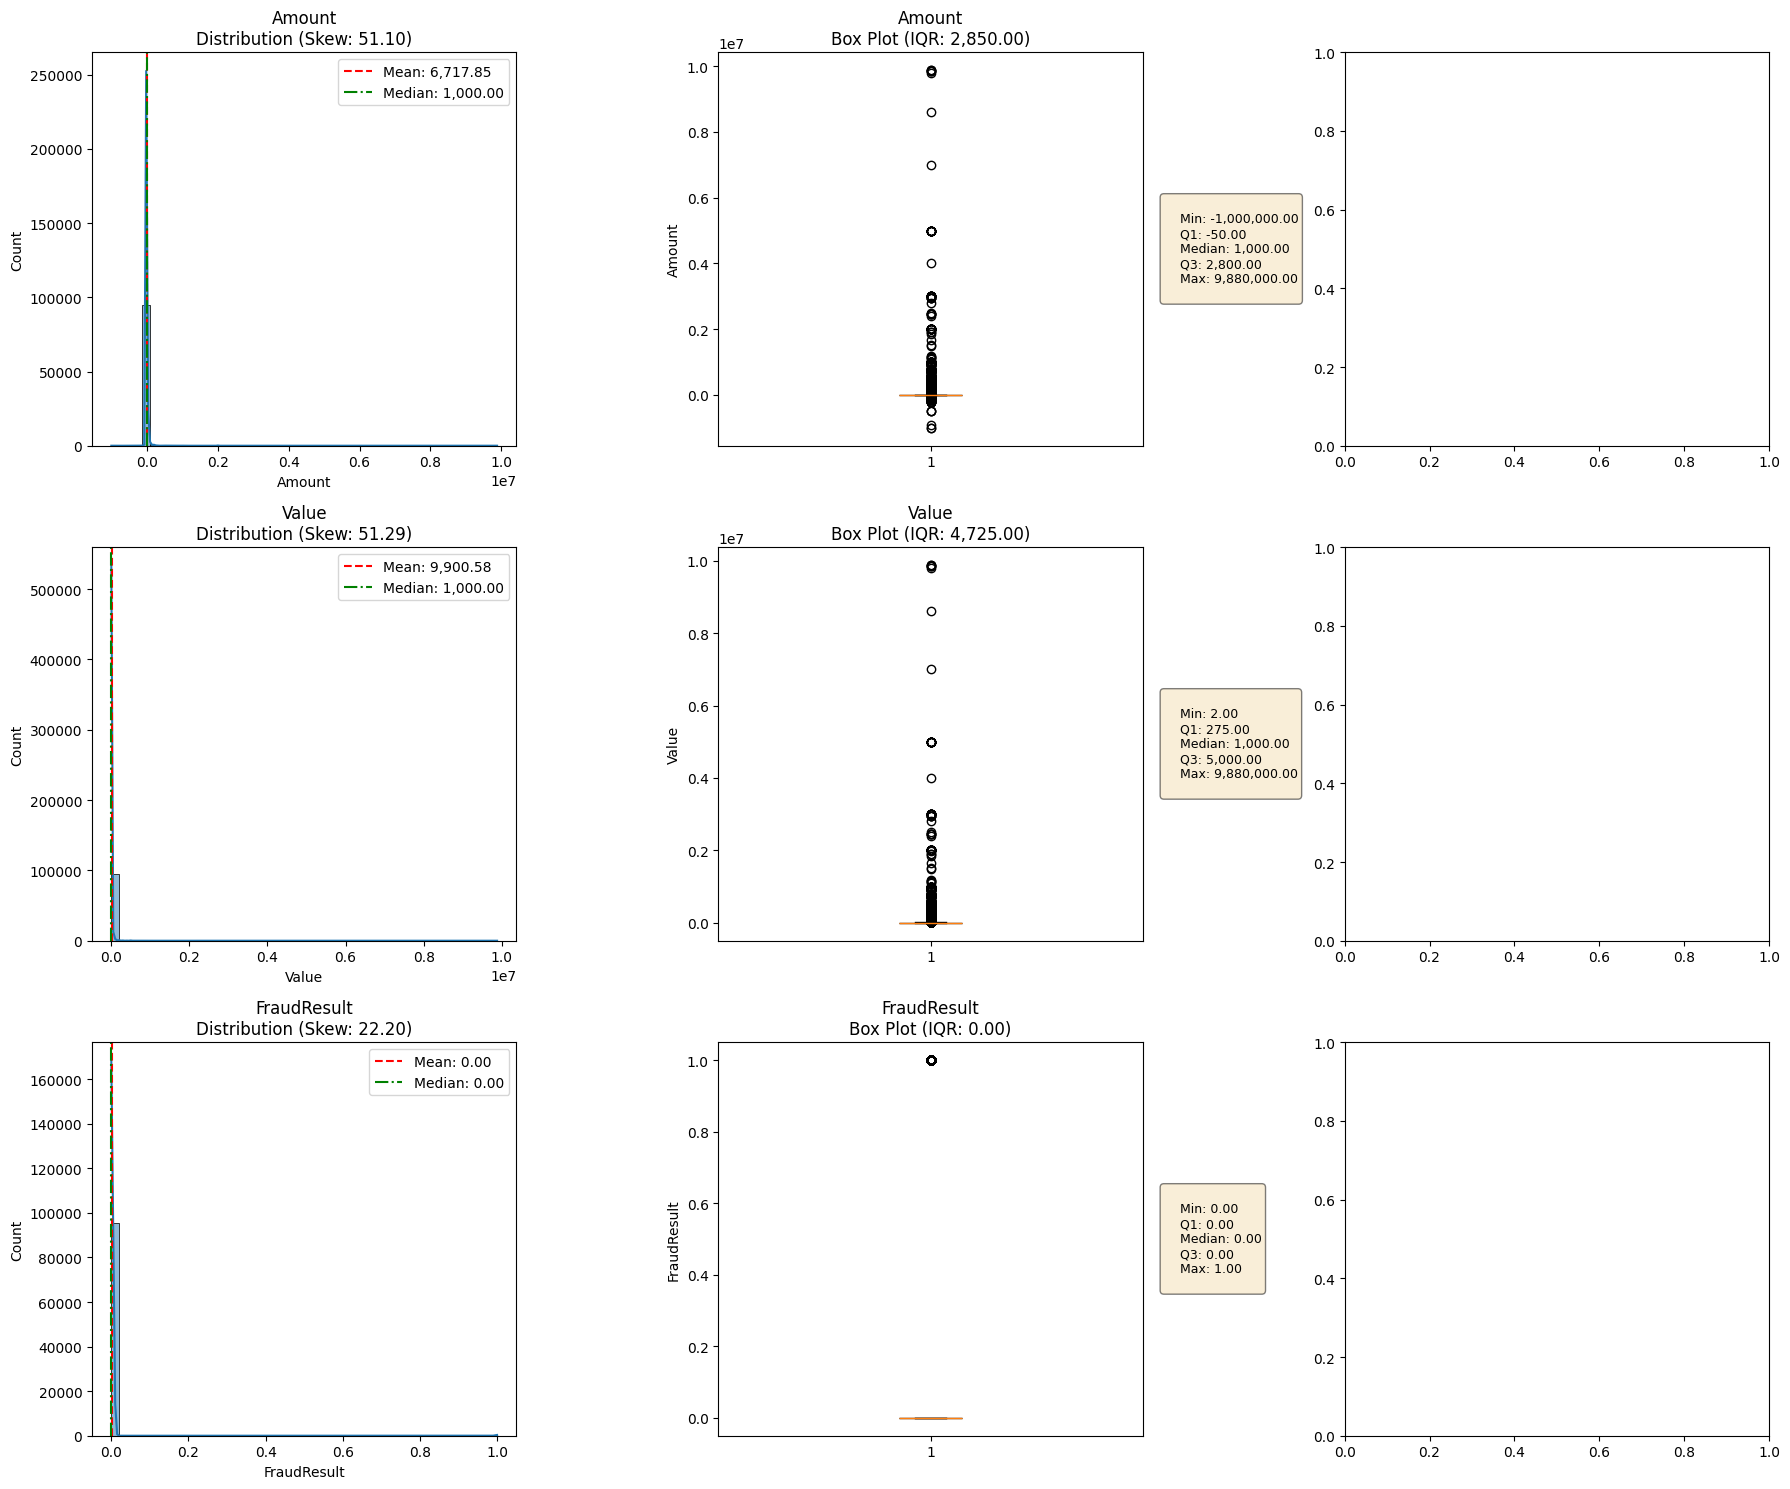

In [19]:
# ============================================
# 5. VISUALIZE STATISTICAL DISTRIBUTIONS
# ============================================

print("\n" + "="*80)
print("📊 VISUALIZING DISTRIBUTION STATISTICS")
print("="*80)

# Select top numerical features for visualization (based on importance for credit risk)
important_numerical = []
for feat in ['Amount', 'Value', 'FraudResult', 'CustomerId', 'TransactionId']:
    if feat in numerical_cols:
        important_numerical.append(feat)

# If our important features are less than 3, add more
if len(important_numerical) < 3:
    important_numerical = numerical_cols[:6]  # Show first 6 numerical columns

print(f"\n📈 Visualizing distributions for: {', '.join(important_numerical)}")

# Create comprehensive visualization
fig, axes = plt.subplots(len(important_numerical), 3, figsize=(18, 5 * len(important_numerical)))

if len(important_numerical) == 1:
    axes = axes.reshape(1, -1)

for idx, col in enumerate(important_numerical):
    data = df[col].dropna()
    
    # 1. Histogram with KDE
    ax1 = axes[idx, 0]
    sns.histplot(data, kde=True, ax=ax1, bins=50)
    ax1.axvline(data.mean(), color='red', linestyle='--', label=f'Mean: {data.mean():,.2f}')
    ax1.axvline(data.median(), color='green', linestyle='-.', label=f'Median: {data.median():,.2f}')
    ax1.set_title(f'{col}\nDistribution (Skew: {data.skew():.2f})')
    ax1.legend()
    
    # 2. Box plot
    ax2 = axes[idx, 1]
    bp = ax2.boxplot(data, vert=True, patch_artist=True)
    bp['boxes'][0].set_facecolor('lightblue')
    ax2.set_title(f'{col}\nBox Plot (IQR: {data.quantile(0.75) - data.quantile(0.25):,.2f})')
    ax2.set_ylabel(col)
    
    # Add summary statistics
    stats_text = f"""
    Min: {data.min():,.2f}
    Q1: {data.quantile(0.25):,.2f}
    Median: {data.median():,.2f}
    Q3: {data.quantile(0.75):,.2f}
    Max: {data.max():,.2f}
    """
    ax2.text(1.05, 0.5, stats_text, transform=ax2.transAxes, 
             verticalalignment='center', fontsize=9,
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    
    
plt.tight_layout()
plt.show()

In [20]:
# ============================================
# 6. CREDIT RISK SPECIFIC STATISTICAL INSIGHTS
# ============================================

print("\n" + "="*80)
print("💡 CREDIT RISK STATISTICAL INSIGHTS")
print("="*80)

# Create insights based on statistics
insights = []

for idx, row in stats_df.iterrows():
    feature = row['Feature']
    
    # Insight 1: High variability features (potential risk indicators)
    if pd.notnull(row['CV %']) and row['CV %'] > 100:
        insights.append(f"🚨 **{feature}** has extremely high variability (CV: {row['CV %']:.1f}%). "
                       f"This could indicate inconsistent customer behavior - a potential risk factor.")
    
    # Insight 2: Highly skewed features
    if abs(row['Skewness']) > 2:
        direction = "right" if row['Skewness'] > 0 else "left"
        insights.append(f"📊 **{feature}** is highly skewed ({direction}-skewed, {row['Skewness']:.2f}). "
                       f"Consider log transformation for modeling.")
    
    # Insight 3: Heavy-tailed distributions (more outliers)
    if row['Kurtosis'] > 5:
        insights.append(f"⚠️  **{feature}** has heavy tails (kurtosis: {row['Kurtosis']:.2f}). "
                       f"Expect more outliers than normal - important for fraud detection.")
    
    # Insight 4: Mean vs Median comparison (outlier sensitivity)
    if abs(row['Mean'] - row['Median']) / max(abs(row['Mean']), abs(row['Median'])) > 0.3:
        insights.append(f"🔍 **{feature}**: Mean ({row['Mean']:,.2f}) differs significantly from "
                       f"Median ({row['Median']:,.2f}), indicating outlier influence.")

# Display insights
print(f"\n📌 **KEY STATISTICAL INSIGHTS FOR CREDIT RISK MODELING**:")
print("-" * 80)

if insights:
    for i, insight in enumerate(insights[:10], 1):  # Show top 10 insights
        print(f"{i}. {insight}")
else:
    print("No extreme statistical patterns detected.")
    
# Transaction Amount specific insights
if 'Amount' in stats_df['Feature'].values:
    amt_stats = stats_df[stats_df['Feature'] == 'Amount'].iloc[0]
    
    print(f"\n💰 **TRANSACTION AMOUNT ANALYSIS**:")
    print("-" * 60)
    
    # Typical transaction size
    print(f"1. **Typical Transaction**:")
    print(f"   • Median: ${amt_stats['Median']:,.2f} (typical transaction size)")
    print(f"   • Mean: ${amt_stats['Mean']:,.2f} (average influenced by large transactions)")
    
    # Transaction variability
    if pd.notnull(amt_stats['CV %']):
        print(f"\n2. **Transaction Consistency**:")
        print(f"   • CV: {amt_stats['CV %']:.1f}% - ", end="")
        if amt_stats['CV %'] < 15:
            print("Low variability (consistent spending patterns)")
        elif amt_stats['CV %'] < 30:
            print("Moderate variability (some spending variation)")
        else:
            print("High variability (inconsistent spending - potential risk indicator)")
    
    # Outlier analysis
    print(f"\n3. **Outlier Analysis**:")
    print(f"   • IQR: ${amt_stats['IQR']:,.2f} (middle 50% range)")
    print(f"   • 95th percentile: ${amt_stats['P95']:,.2f}")
    print(f"   • 99th percentile: ${amt_stats['P99']:,.2f}")
    print(f"   • Range: ${amt_stats['Range']:,.2f}")
    
    # Skewness implications
    skew_val = amt_stats['Skewness']
    if skew_val > 1:
        print(f"\n4. **Distribution Shape**:")
        print(f"   • Right-skewed ({skew_val:.2f}): Many small transactions, few large ones")
        print(f"   • Common in retail: Most people make small purchases")


💡 CREDIT RISK STATISTICAL INSIGHTS

📌 **KEY STATISTICAL INSIGHTS FOR CREDIT RISK MODELING**:
--------------------------------------------------------------------------------
1. 🚨 **Amount** has extremely high variability (CV: 1835.5%). This could indicate inconsistent customer behavior - a potential risk factor.
2. 📊 **Amount** is highly skewed (right-skewed, 51.10). Consider log transformation for modeling.
3. ⚠️  **Amount** has heavy tails (kurtosis: 3363.13). Expect more outliers than normal - important for fraud detection.
4. 🔍 **Amount**: Mean (6,717.85) differs significantly from Median (1,000.00), indicating outlier influence.
5. 🚨 **Value** has extremely high variability (CV: 1243.6%). This could indicate inconsistent customer behavior - a potential risk factor.
6. 📊 **Value** is highly skewed (right-skewed, 51.29). Consider log transformation for modeling.
7. ⚠️  **Value** has heavy tails (kurtosis: 3378.07). Expect more outliers than normal - important for fraud detection.
8

In [21]:
# ============================================
# 7. EXECUTIVE SUMMARY OF STATISTICAL FINDINGS
# ============================================

print("\n" + "="*80)
print("📋 EXECUTIVE SUMMARY: STATISTICAL FINDINGS")
print("="*80)

print(f"\n🎯 **OVERALL DATASET CHARACTERISTICS**:")
print("-" * 60)
print(f"• {len(stats_df)} numerical features analyzed")
print(f"• Average missing values across features: {stats_df['Missing %'].mean():.1f}%")

# Count features by skewness category
high_skew = (abs(stats_df['Skewness']) > 1).sum()
mod_skew = ((abs(stats_df['Skewness']) > 0.5) & (abs(stats_df['Skewness']) <= 1)).sum()
low_skew = (abs(stats_df['Skewness']) <= 0.5).sum()

print(f"\n📊 **DISTRIBUTION SHAPES**:")
print(f"• Highly skewed features: {high_skew} (need transformation)")
print(f"• Moderately skewed features: {mod_skew}")
print(f"• Approximately symmetric: {low_skew}")

# Count features by variability
if 'CV %' in stats_df.columns:
    high_var = (stats_df['CV %'] > 30).sum()
    mod_var = ((stats_df['CV %'] > 15) & (stats_df['CV %'] <= 30)).sum()
    low_var = (stats_df['CV %'] <= 15).sum()
    
    print(f"\n📈 **VARIABILITY ANALYSIS**:")
    print(f"• High variability (CV > 30%): {high_var} features")
    print(f"• Moderate variability (15-30%): {mod_var} features")
    print(f"• Low variability (CV ≤ 15%): {low_var} features")

print(f"\n💡 **IMPLICATIONS FOR CREDIT RISK MODELING**:")
print("-" * 60)
print("""
1. **Data Preprocessing Needed**:
   • Skewed features may require log/power transformations
   • High variability features need careful scaling
   • Outliers should be analyzed for fraud patterns

2. **Feature Engineering Opportunities**:
   • Create features from percentiles (e.g., 'above_95th_percentile')
   • Use IQR for outlier detection rules
   • Consider creating variability metrics per customer

3. **Model Selection Considerations**:
   • Tree-based models handle skewness better
   • Linear models need normally distributed features
   • Consider robust scaling for high-variability features
""")

print(f"\n" + "="*80)
print("🎯 READY FOR PART 3: DISTRIBUTION OF NUMERICAL FEATURES")
print("="*80)


📋 EXECUTIVE SUMMARY: STATISTICAL FINDINGS

🎯 **OVERALL DATASET CHARACTERISTICS**:
------------------------------------------------------------
• 4 numerical features analyzed
• Average missing values across features: 0.0%

📊 **DISTRIBUTION SHAPES**:
• Highly skewed features: 4 (need transformation)
• Moderately skewed features: 0
• Approximately symmetric: 0

📈 **VARIABILITY ANALYSIS**:
• High variability (CV > 30%): 4 features
• Moderate variability (15-30%): 0 features
• Low variability (CV ≤ 15%): 0 features

💡 **IMPLICATIONS FOR CREDIT RISK MODELING**:
------------------------------------------------------------

1. **Data Preprocessing Needed**:
   • Skewed features may require log/power transformations
   • High variability features need careful scaling
   • Outliers should be analyzed for fraud patterns

2. **Feature Engineering Opportunities**:
   • Create features from percentiles (e.g., 'above_95th_percentile')
   • Use IQR for outlier detection rules
   • Consider creating 


📊 PART 3: DISTRIBUTION OF NUMERICAL FEATURES

🔢 Numerical Features to Analyze (5):
  • CountryCode
  • Amount
  • Value
  • PricingStrategy
  • FraudResult

📈 VISUALIZING DISTRIBUTIONS WITH MULTIPLE PERSPECTIVES


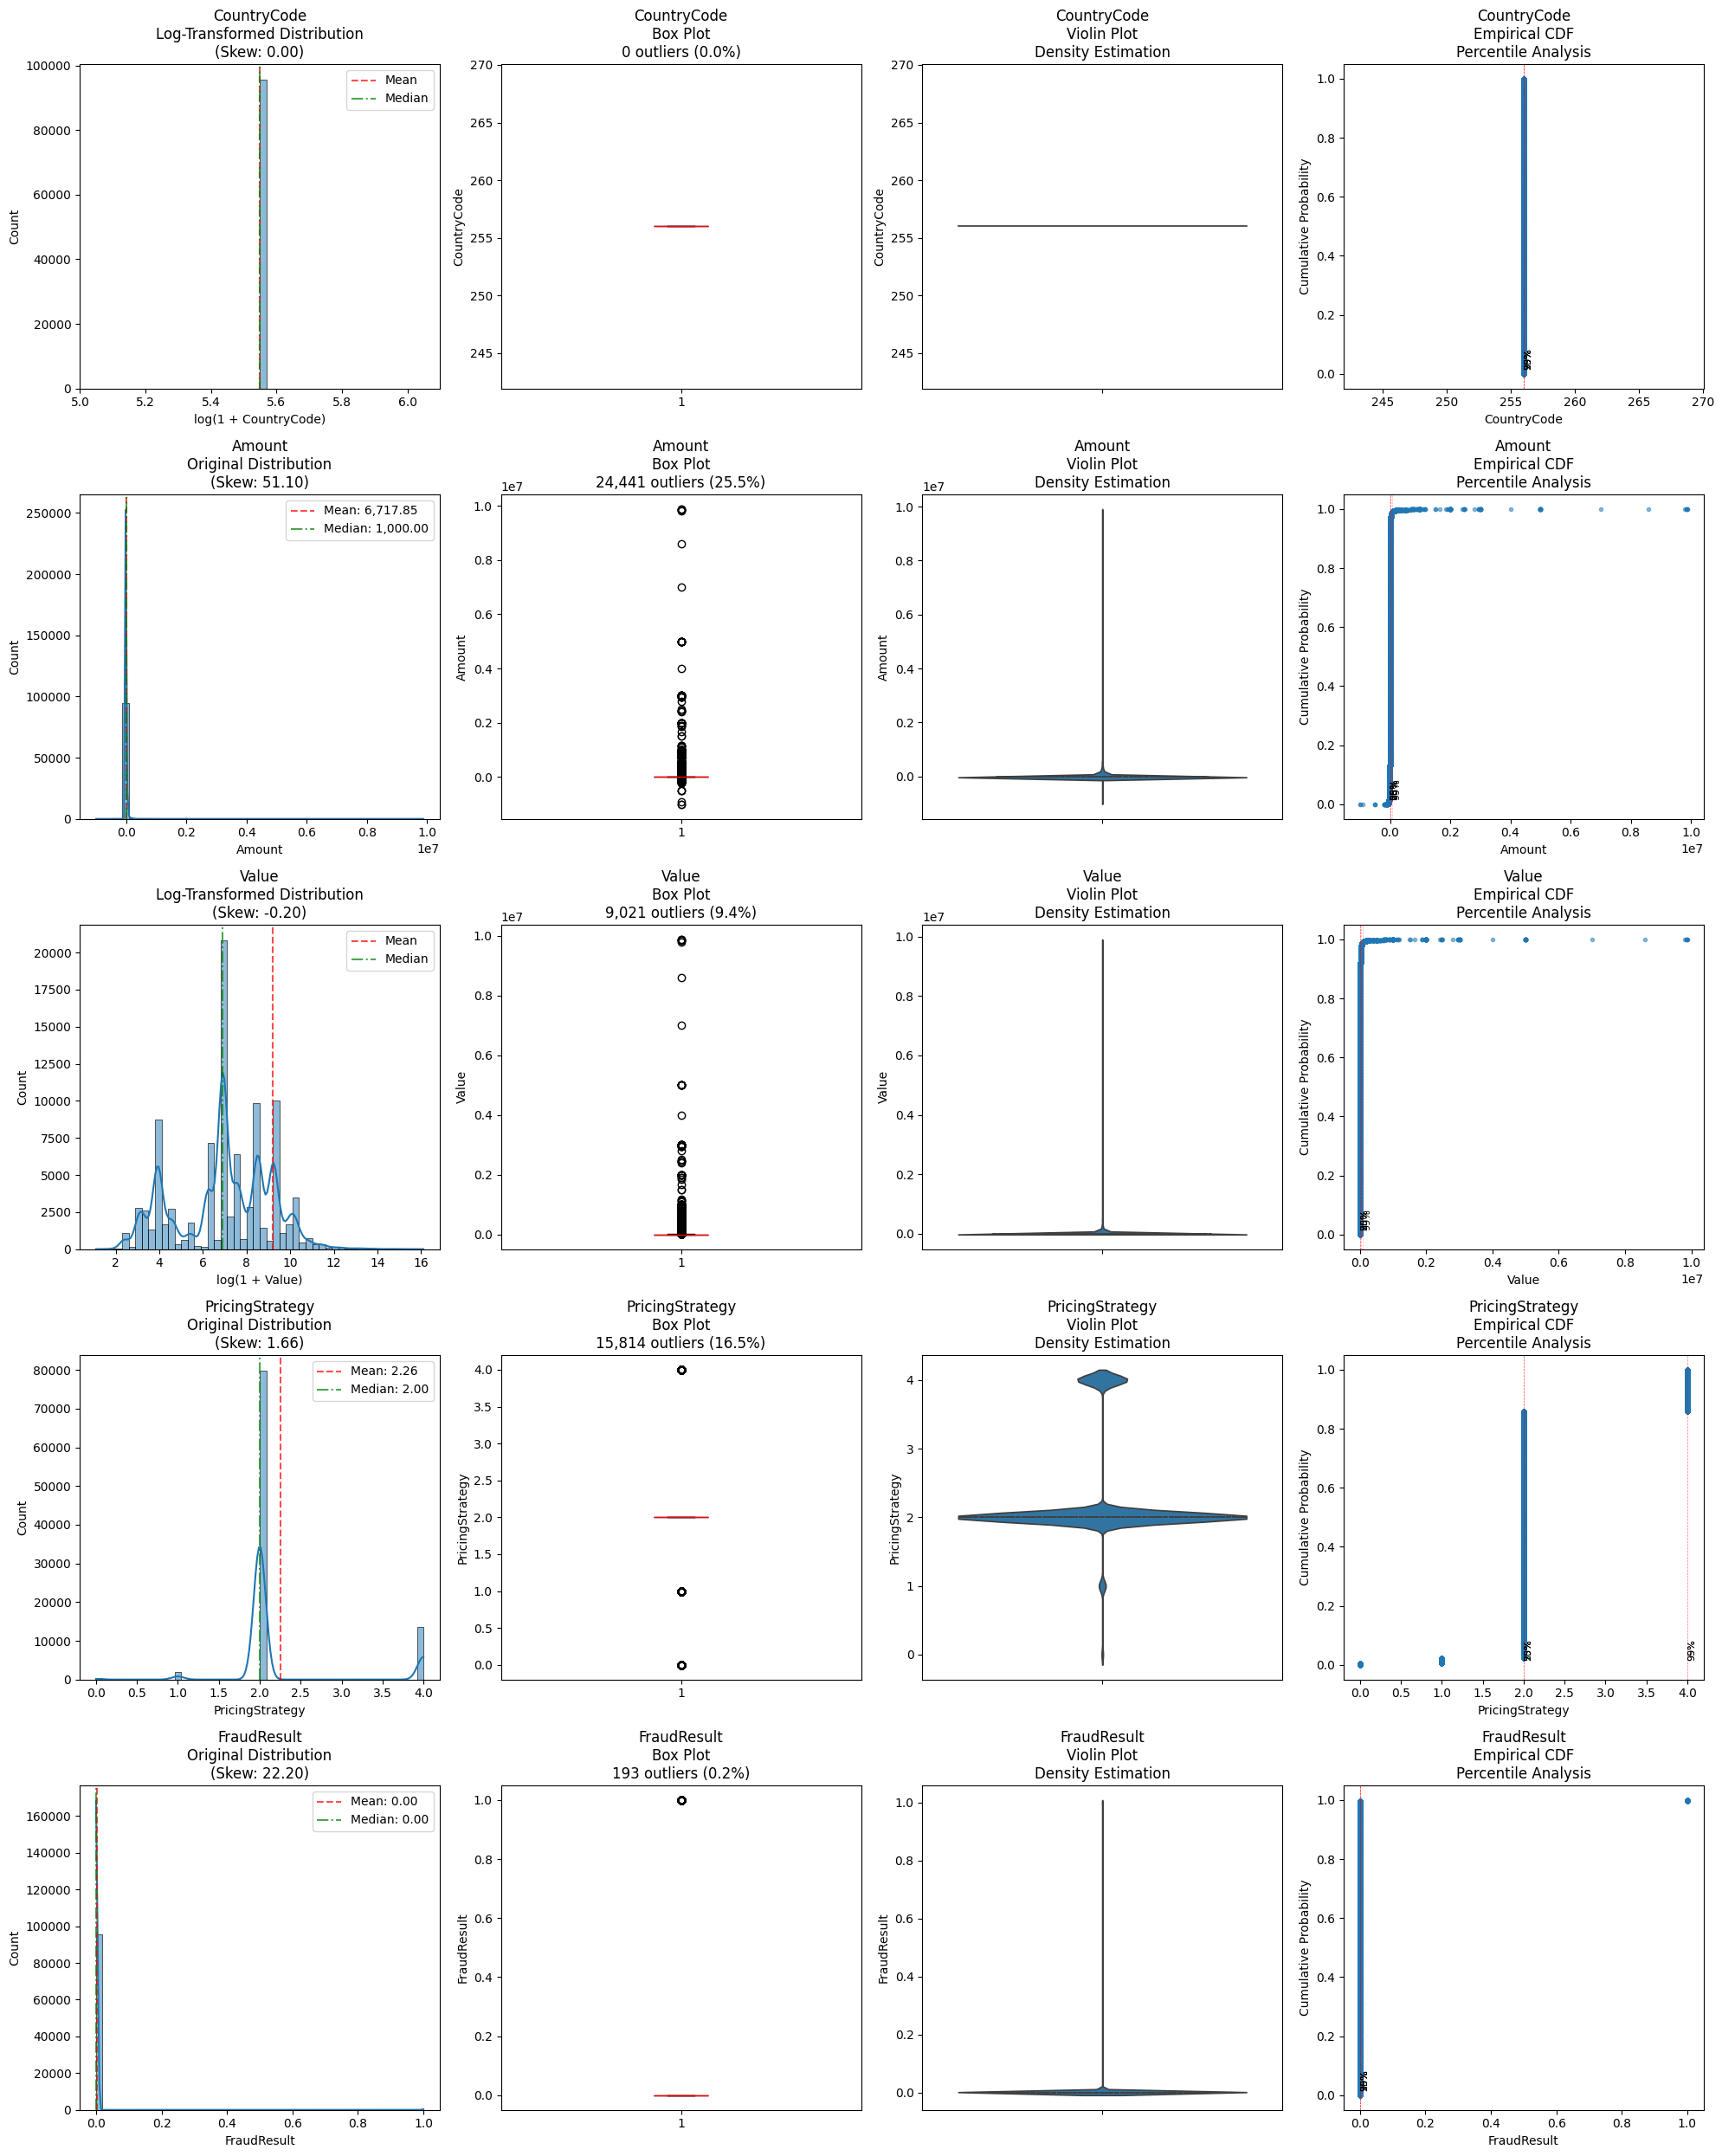


🔍 DETAILED OUTLIER ANALYSIS FOR AMOUNT

📊 Amount Outlier Statistics:
------------------------------------------------------------
• Total transactions: 95,662
• Outliers detected: 24,441 (25.55%)
• Lower bound: $-4,325.00
• Upper bound: $7,075.00
• Min outlier: $-1,000,000.00
• Max outlier: $9,880,000.00

📈 Outlier Distribution Analysis:
------------------------------------------------------------
• Positive outliers (>$7,075.00): 15,013
• Negative outliers (<$-4,325.00): 9,428

💰 Top 5 Largest Transactions:
  1. Transaction: $9,880,000.00
  2. Transaction: $9,870,000.00
  3. Transaction: $9,860,888.00
  4. Transaction: $9,856,000.00
  5. Transaction: $9,850,000.00


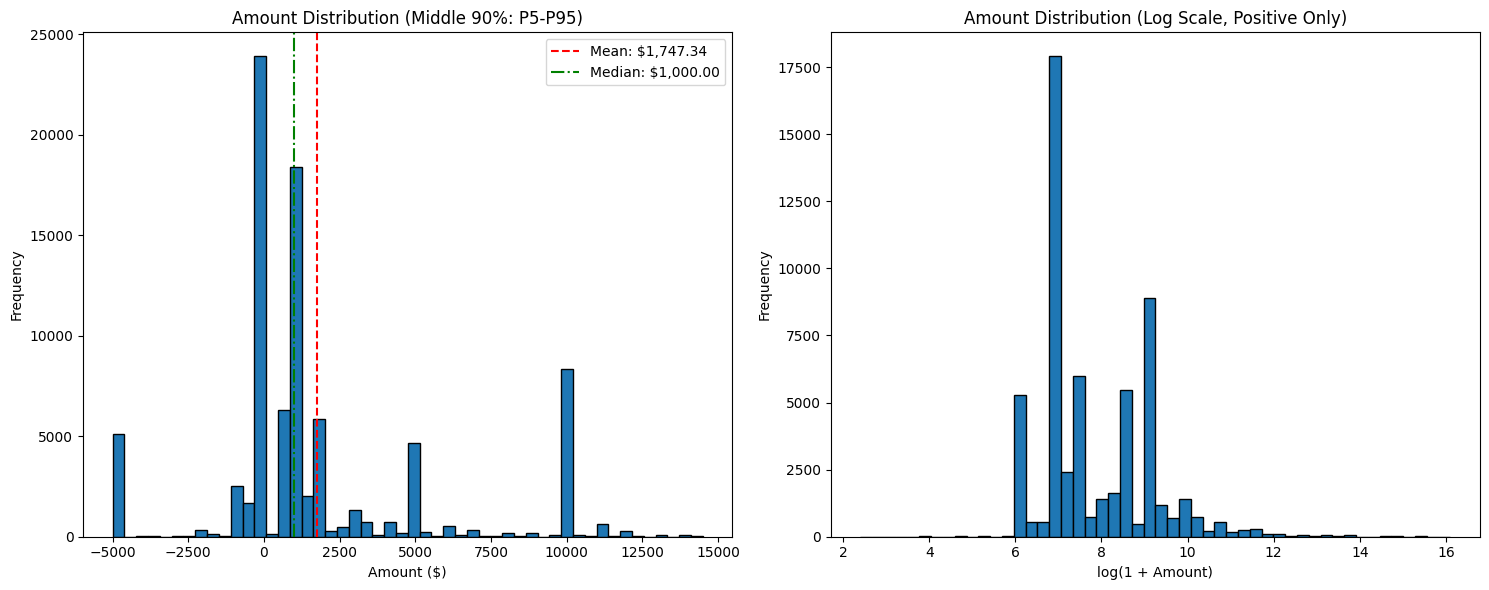

In [22]:
# ============================================
# PART 3: DISTRIBUTION OF NUMERICAL FEATURES
# ============================================

print("\n" + "="*80)
print("📊 PART 3: DISTRIBUTION OF NUMERICAL FEATURES")
print("="*80)

# Identify numerical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"\n🔢 Numerical Features to Analyze ({len(numerical_cols)}):")
for col in numerical_cols:
    print(f"  • {col}")

# ============================================
# 1. COMPREHENSIVE DISTRIBUTION VISUALIZATION
# ============================================

print("\n📈 VISUALIZING DISTRIBUTIONS WITH MULTIPLE PERSPECTIVES")

# Create a multi-plot visualization for each numerical feature
fig, axes = plt.subplots(len(numerical_cols), 4, figsize=(20, 5 * len(numerical_cols)))

if len(numerical_cols) == 1:
    axes = axes.reshape(1, -1)

for idx, col in enumerate(numerical_cols):
    data = df[col].dropna()
    
    # 1. Histogram with KDE and log scale (if needed)
    ax1 = axes[idx, 0]
    # Check if log transformation helps visualization
    if data.min() > 0:  # Only log-transform if all values positive
        log_data = np.log1p(data)
        sns.histplot(log_data, kde=True, ax=ax1, bins=50)
        ax1.set_title(f'{col}\nLog-Transformed Distribution\n(Skew: {log_data.skew():.2f})')
        ax1.set_xlabel(f'log(1 + {col})')
    else:
        sns.histplot(data, kde=True, ax=ax1, bins=50)
        ax1.set_title(f'{col}\nOriginal Distribution\n(Skew: {data.skew():.2f})')
        ax1.set_xlabel(col)
    
    # Add mean and median lines
    if data.min() > 0:
        ax1.axvline(np.log1p(data.mean()), color='red', linestyle='--', alpha=0.7, label=f'Mean')
        ax1.axvline(np.log1p(data.median()), color='green', linestyle='-.', alpha=0.7, label=f'Median')
    else:
        ax1.axvline(data.mean(), color='red', linestyle='--', alpha=0.7, label=f'Mean: {data.mean():,.2f}')
        ax1.axvline(data.median(), color='green', linestyle='-.', alpha=0.7, label=f'Median: {data.median():,.2f}')
    ax1.legend()
    
    # 2. Box plot with outlier identification
    ax2 = axes[idx, 1]
    bp = ax2.boxplot(data, vert=True, patch_artist=True, showfliers=True)
    bp['boxes'][0].set_facecolor('lightblue')
    bp['medians'][0].set_color('red')
    
    # Calculate and mark outliers
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    outliers = data[(data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))]
    
    ax2.set_title(f'{col}\nBox Plot\n{len(outliers):,} outliers ({len(outliers)/len(data)*100:.1f}%)')
    ax2.set_ylabel(col)
    
    # 3. Violin plot for distribution shape
    ax3 = axes[idx, 2]
    sns.violinplot(y=data, ax=ax3, inner='quartile')
    ax3.set_title(f'{col}\nViolin Plot\nDensity Estimation')
    ax3.set_ylabel(col)
    
    # 4. ECDF plot for cumulative distribution
    ax4 = axes[idx, 3]
    sorted_data = np.sort(data)
    y_vals = np.arange(1, len(sorted_data) + 1) / len(sorted_data)
    ax4.plot(sorted_data, y_vals, marker='.', linestyle='none', alpha=0.5)
    ax4.set_title(f'{col}\nEmpirical CDF\nPercentile Analysis')
    ax4.set_xlabel(col)
    ax4.set_ylabel('Cumulative Probability')
    
    # Add percentile markers
    percentiles = [25, 50, 75, 95, 99]
    for p in percentiles:
        p_value = np.percentile(data, p)
        ax4.axvline(p_value, color='red', linestyle='--', alpha=0.3, linewidth=0.5)
        ax4.text(p_value, 0.02, f'{p}%', rotation=90, fontsize=8)

plt.tight_layout()
plt.show()

# ============================================
# 2. DETAILED OUTLIER ANALYSIS FOR AMOUNT
# ============================================

print("\n" + "="*80)
print("🔍 DETAILED OUTLIER ANALYSIS FOR AMOUNT")
print("="*80)

if 'Amount' in df.columns:
    amount_data = df['Amount'].dropna()
    
    # Calculate outlier thresholds using IQR
    Q1 = amount_data.quantile(0.25)
    Q3 = amount_data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = amount_data[(amount_data < lower_bound) | (amount_data > upper_bound)]
    
    print(f"\n📊 Amount Outlier Statistics:")
    print("-" * 60)
    print(f"• Total transactions: {len(amount_data):,}")
    print(f"• Outliers detected: {len(outliers):,} ({len(outliers)/len(amount_data)*100:.2f}%)")
    print(f"• Lower bound: ${lower_bound:,.2f}")
    print(f"• Upper bound: ${upper_bound:,.2f}")
    print(f"• Min outlier: ${outliers.min():,.2f}")
    print(f"• Max outlier: ${outliers.max():,.2f}")
    
    # Analyze outlier characteristics
    print(f"\n📈 Outlier Distribution Analysis:")
    print("-" * 60)
    
    # Separate positive and negative outliers
    positive_outliers = outliers[outliers > upper_bound]
    negative_outliers = outliers[outliers < lower_bound]
    
    print(f"• Positive outliers (>${upper_bound:,.2f}): {len(positive_outliers):,}")
    print(f"• Negative outliers (<${lower_bound:,.2f}): {len(negative_outliers):,}")
    
    if len(positive_outliers) > 0:
        print(f"\n💰 Top 5 Largest Transactions:")
        top_5 = positive_outliers.nlargest(5)
        for i, (idx, value) in enumerate(top_5.items(), 1):
            print(f"  {i}. Transaction: ${value:,.2f}")
    
    # Visualize outliers in context
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # 1. Zoomed-in view (middle 95%)
    p95 = amount_data.quantile(0.95)
    p5 = amount_data.quantile(0.05)
    zoomed_data = amount_data[(amount_data >= p5) & (amount_data <= p95)]
    
    ax1.hist(zoomed_data, bins=50, edgecolor='black')
    ax1.set_title('Amount Distribution (Middle 90%: P5-P95)')
    ax1.set_xlabel('Amount ($)')
    ax1.set_ylabel('Frequency')
    ax1.axvline(zoomed_data.mean(), color='red', linestyle='--', label=f'Mean: ${zoomed_data.mean():,.2f}')
    ax1.axvline(zoomed_data.median(), color='green', linestyle='-.', label=f'Median: ${zoomed_data.median():,.2f}')
    ax1.legend()
    
    # 2. Log-scaled view of all data
    positive_amounts = amount_data[amount_data > 0]
    if len(positive_amounts) > 0:
        ax2.hist(np.log1p(positive_amounts), bins=50, edgecolor='black')
        ax2.set_title('Amount Distribution (Log Scale, Positive Only)')
        ax2.set_xlabel('log(1 + Amount)')
        ax2.set_ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()


📊 PART 4: DISTRIBUTION OF CATEGORICAL FEATURES

📝 Categorical Features to Analyze (11):
  • TransactionId             - 95662 unique values
  • BatchId                   - 94809 unique values
  • AccountId                 -  3633 unique values
  • SubscriptionId            -  3627 unique values
  • CustomerId                -  3742 unique values
  • CurrencyCode              -     1 unique values
  • ProviderId                -     6 unique values
  • ProductId                 -    23 unique values
  • ProductCategory           -     9 unique values
  • ChannelId                 -     4 unique values
  • TransactionStartTime      - 94556 unique values

📈 TOP CATEGORIES ANALYSIS FOR KEY FEATURES


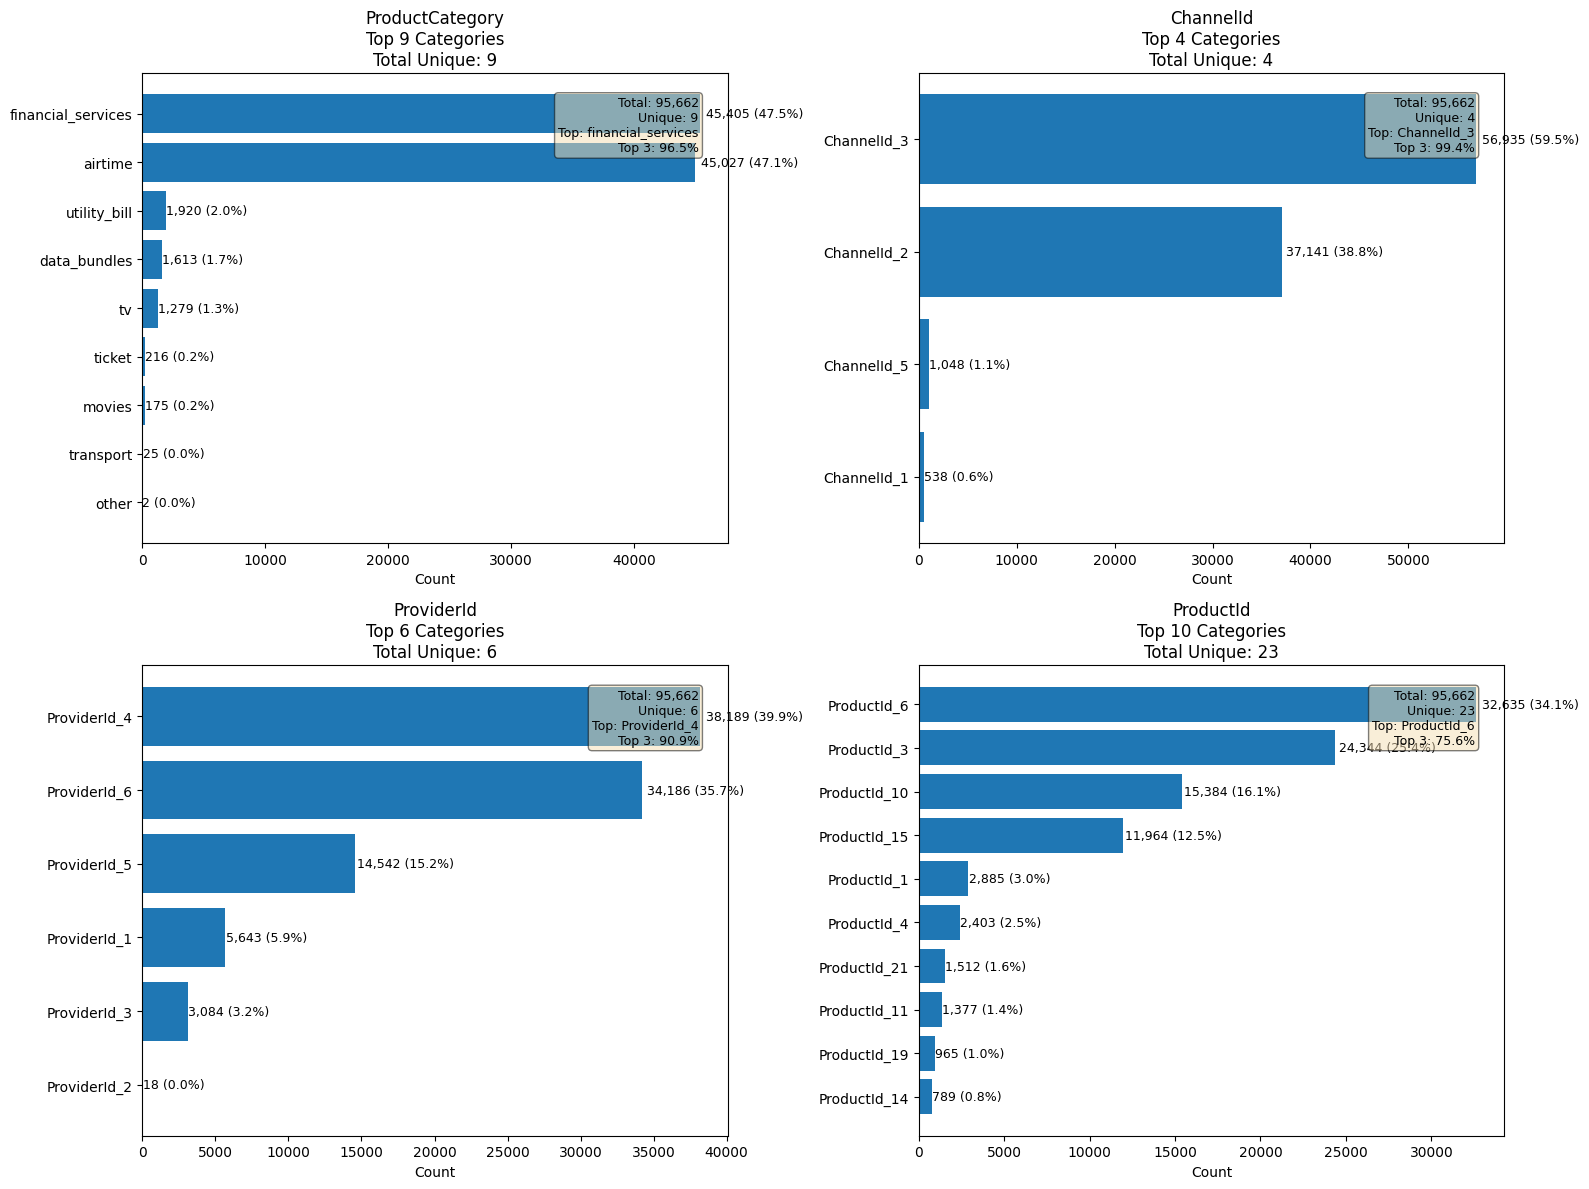


👤 CUSTOMER BEHAVIOR ANALYSIS

📊 Customer Statistics:
------------------------------------------------------------
• Unique customers: 3,742
• Total transactions: 95,662
• Avg transactions per customer: 25.6

📈 Transaction Distribution per Customer:
------------------------------------------------------------
• 10th percentile: 1 transactions
• 25th percentile: 2 transactions
• 50th percentile: 7 transactions
• 75th percentile: 20 transactions
• 90th percentile: 58 transactions
• 95th percentile: 98 transactions
• 99th percentile: 276 transactions

🏆 Top 10 Most Active Customers:
------------------------------------------------------------
 1. Customer CustomerId_7343: 4,091 transactions (4.28%)
 2. Customer CustomerId_3634: 2,085 transactions (2.18%)
 3. Customer CustomerId_647: 1,869 transactions (1.95%)
 4. Customer CustomerId_1096:   784 transactions (0.82%)
 5. Customer CustomerId_4033:   778 transactions (0.81%)
 6. Customer CustomerId_3066:   612 transactions (0.64%)
 7. Custome

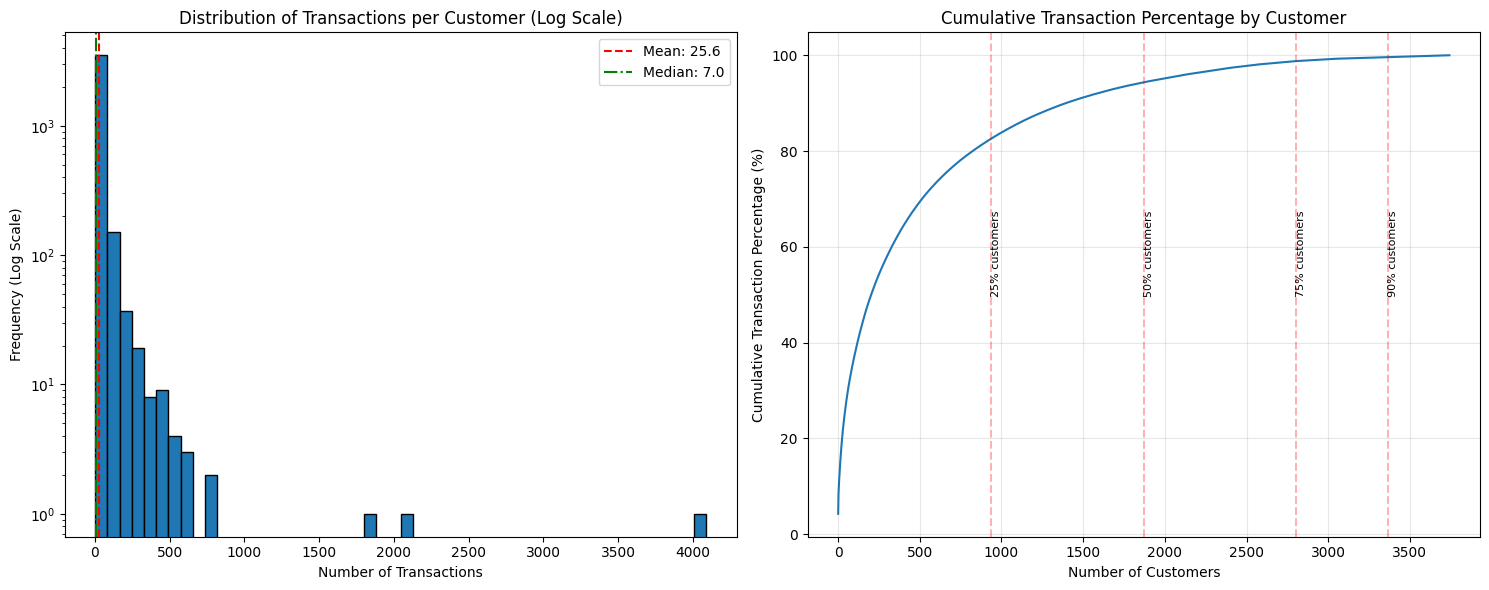


⏰ TEMPORAL PATTERNS ANALYSIS

📅 Date Range Analysis:
------------------------------------------------------------
• Start Date: 2018-11-15 02:18:49+00:00
• End Date: 2019-02-13 10:01:28+00:00
• Date Range: 90 days
• Unique Dates: 91


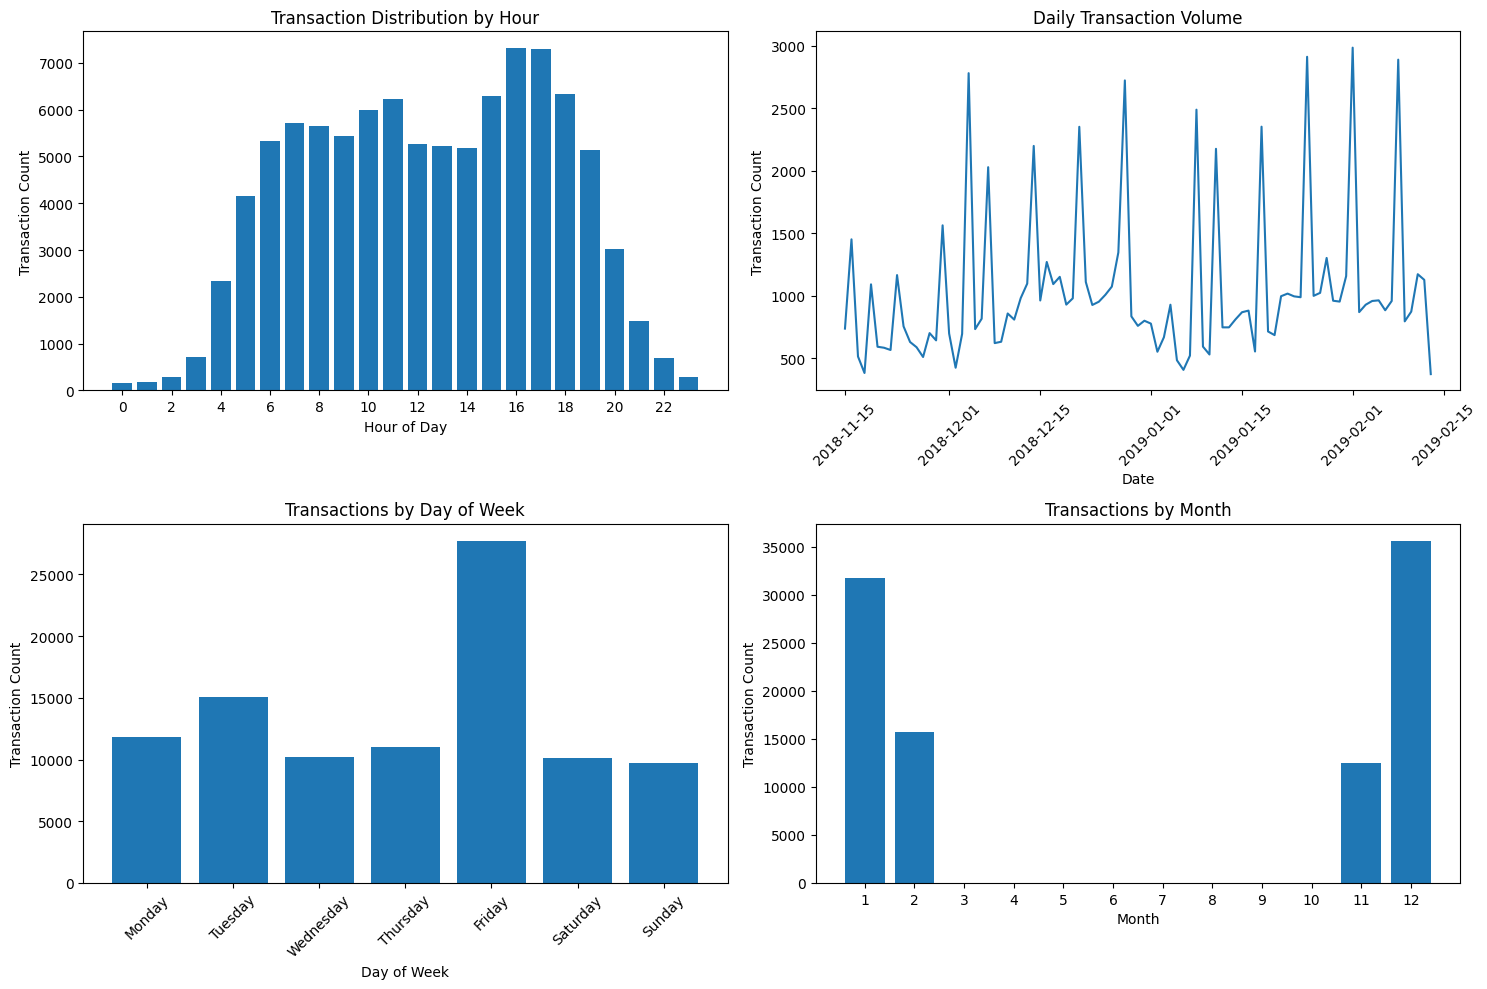

In [23]:
# ============================================
# PART 4: DISTRIBUTION OF CATEGORICAL FEATURES
# ============================================

print("\n" + "="*80)
print("📊 PART 4: DISTRIBUTION OF CATEGORICAL FEATURES")
print("="*80)

# Identify categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f"\n📝 Categorical Features to Analyze ({len(categorical_cols)}):")
for col in categorical_cols:
    unique_count = df[col].nunique()
    print(f"  • {col:<25} - {unique_count:>5} unique values")

# ============================================
# 1. TOP CATEGORIES ANALYSIS
# ============================================

print("\n📈 TOP CATEGORIES ANALYSIS FOR KEY FEATURES")

# Select key categorical features for detailed analysis
key_categorical = ['ProductCategory', 'ChannelId', 'ProviderId', 'ProductId']

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for idx, col in enumerate(key_categorical):
    if col in df.columns:
        ax = axes[idx]
        
        # Get value counts
        value_counts = df[col].value_counts()
        
        # Plot top 10 categories
        top_n = min(10, len(value_counts))
        top_values = value_counts.head(top_n)
        
        # Create bar plot
        bars = ax.barh(range(len(top_values)), top_values.values)
        ax.set_yticks(range(len(top_values)))
        ax.set_yticklabels(top_values.index)
        ax.invert_yaxis()
        
        # Add counts on bars
        for i, (bar, count) in enumerate(zip(bars, top_values.values)):
            ax.text(bar.get_width() + bar.get_width()*0.01, 
                   bar.get_y() + bar.get_height()/2,
                   f'{count:,} ({count/len(df)*100:.1f}%)',
                   va='center', fontsize=9)
        
        ax.set_title(f'{col}\nTop {top_n} Categories\nTotal Unique: {df[col].nunique()}')
        ax.set_xlabel('Count')
        
        # Add summary statistics
        stats_text = f"Total: {len(df):,}\nUnique: {df[col].nunique()}\nTop: {top_values.index[0]}\n"
        stats_text += f"Top 3: {top_values.values[:3].sum()/len(df)*100:.1f}%"
        ax.text(0.95, 0.95, stats_text, transform=ax.transAxes,
                verticalalignment='top', horizontalalignment='right',
                fontsize=9, bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.tight_layout()
plt.show()

# ============================================
# 2. CUSTOMER BEHAVIOR ANALYSIS
# ============================================

print("\n" + "="*80)
print("👤 CUSTOMER BEHAVIOR ANALYSIS")
print("="*80)

if 'CustomerId' in df.columns:
    print(f"\n📊 Customer Statistics:")
    print("-" * 60)
    
    # Customer transaction frequency
    customer_counts = df['CustomerId'].value_counts()
    
    print(f"• Unique customers: {df['CustomerId'].nunique():,}")
    print(f"• Total transactions: {len(df):,}")
    print(f"• Avg transactions per customer: {len(df)/df['CustomerId'].nunique():.1f}")
    
    # Transaction distribution per customer
    print(f"\n📈 Transaction Distribution per Customer:")
    print("-" * 60)
    
    percentiles = [10, 25, 50, 75, 90, 95, 99]
    for p in percentiles:
        p_value = customer_counts.quantile(p/100)
        print(f"• {p}th percentile: {p_value:.0f} transactions")
    
    # Top customers analysis
    top_10_customers = customer_counts.head(10)
    print(f"\n🏆 Top 10 Most Active Customers:")
    print("-" * 60)
    for i, (customer_id, count) in enumerate(top_10_customers.items(), 1):
        percentage = (count / len(df)) * 100
        print(f"{i:2}. Customer {customer_id}: {count:>5,} transactions ({percentage:.2f}%)")
    
    # Visualize customer transaction distribution
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # 1. Histogram of transactions per customer
    ax1.hist(customer_counts.values, bins=50, edgecolor='black', log=True)
    ax1.set_title('Distribution of Transactions per Customer (Log Scale)')
    ax1.set_xlabel('Number of Transactions')
    ax1.set_ylabel('Frequency (Log Scale)')
    ax1.axvline(customer_counts.mean(), color='red', linestyle='--', 
                label=f'Mean: {customer_counts.mean():.1f}')
    ax1.axvline(customer_counts.median(), color='green', linestyle='-.', 
                label=f'Median: {customer_counts.median():.1f}')
    ax1.legend()
    
    # 2. Cumulative distribution
    sorted_counts = np.sort(customer_counts.values)[::-1]
    cumulative_percentage = np.cumsum(sorted_counts) / np.sum(sorted_counts) * 100
    
    ax2.plot(range(1, len(sorted_counts) + 1), cumulative_percentage)
    ax2.set_title('Cumulative Transaction Percentage by Customer')
    ax2.set_xlabel('Number of Customers')
    ax2.set_ylabel('Cumulative Transaction Percentage (%)')
    ax2.grid(True, alpha=0.3)
    
    # Mark key points
    for p in [25, 50, 75, 90]:
        idx = int(len(sorted_counts) * p / 100)
        ax2.axvline(idx, color='red', linestyle='--', alpha=0.3)
        ax2.text(idx, 50, f'{p}% customers', rotation=90, fontsize=8)
    
    plt.tight_layout()
    plt.show()

# ============================================
# 3. TEMPORAL ANALYSIS (TransactionStartTime)
# ============================================

print("\n" + "="*80)
print("⏰ TEMPORAL PATTERNS ANALYSIS")
print("="*80)

if 'TransactionStartTime' in df.columns:
    # Convert to datetime
    df['TransactionStartTime'] = pd.to_datetime(df['TransactionStartTime'])
    
    print(f"\n📅 Date Range Analysis:")
    print("-" * 60)
    print(f"• Start Date: {df['TransactionStartTime'].min()}")
    print(f"• End Date: {df['TransactionStartTime'].max()}")
    print(f"• Date Range: {(df['TransactionStartTime'].max() - df['TransactionStartTime'].min()).days} days")
    print(f"• Unique Dates: {df['TransactionStartTime'].dt.date.nunique()}")
    
    # Extract temporal features
    df['TransactionHour'] = df['TransactionStartTime'].dt.hour
    df['TransactionDay'] = df['TransactionStartTime'].dt.day
    df['TransactionMonth'] = df['TransactionStartTime'].dt.month
    df['TransactionDayOfWeek'] = df['TransactionStartTime'].dt.day_name()
    
    # Visualize temporal patterns
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # 1. Hourly distribution
    hourly_counts = df['TransactionHour'].value_counts().sort_index()
    axes[0, 0].bar(hourly_counts.index, hourly_counts.values)
    axes[0, 0].set_title('Transaction Distribution by Hour')
    axes[0, 0].set_xlabel('Hour of Day')
    axes[0, 0].set_ylabel('Transaction Count')
    axes[0, 0].set_xticks(range(0, 24, 2))
    
    # 2. Daily distribution
    daily_counts = df.groupby(df['TransactionStartTime'].dt.date).size()
    axes[0, 1].plot(daily_counts.index, daily_counts.values)
    axes[0, 1].set_title('Daily Transaction Volume')
    axes[0, 1].set_xlabel('Date')
    axes[0, 1].set_ylabel('Transaction Count')
    axes[0, 1].tick_params(axis='x', rotation=45)
    
    # 3. Day of week distribution
    dow_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    dow_counts = df['TransactionDayOfWeek'].value_counts().reindex(dow_order)
    axes[1, 0].bar(range(len(dow_counts)), dow_counts.values)
    axes[1, 0].set_title('Transactions by Day of Week')
    axes[1, 0].set_xlabel('Day of Week')
    axes[1, 0].set_ylabel('Transaction Count')
    axes[1, 0].set_xticks(range(len(dow_counts)))
    axes[1, 0].set_xticklabels(dow_counts.index, rotation=45)
    
    # 4. Monthly distribution
    monthly_counts = df['TransactionMonth'].value_counts().sort_index()
    axes[1, 1].bar(monthly_counts.index, monthly_counts.values)
    axes[1, 1].set_title('Transactions by Month')
    axes[1, 1].set_xlabel('Month')
    axes[1, 1].set_ylabel('Transaction Count')
    axes[1, 1].set_xticks(range(1, 13))
    
    plt.tight_layout()
    plt.show()


📊 PART 5: CORRELATION ANALYSIS

🔗 Analyzing correlations among 8 numerical features

📈 Correlation Matrix (Pearson):
--------------------------------------------------------------------------------
                 CountryCode  Amount   Value PricingStrategy FraudResult  \
CountryCode              nan     nan     nan             nan         nan   
Amount                   nan   1.000   0.990          -0.062       0.557   
Value                    nan   0.990   1.000          -0.017       0.567   
PricingStrategy          nan  -0.062  -0.017           1.000      -0.034   
FraudResult              nan   0.557   0.567          -0.034       1.000   
TransactionHour          nan  -0.002   0.000           0.007       0.008   
TransactionDay           nan  -0.004  -0.024          -0.132      -0.009   
TransactionMonth         nan  -0.009  -0.010          -0.031      -0.009   

                 TransactionHour TransactionDay TransactionMonth  
CountryCode                  nan            nan  

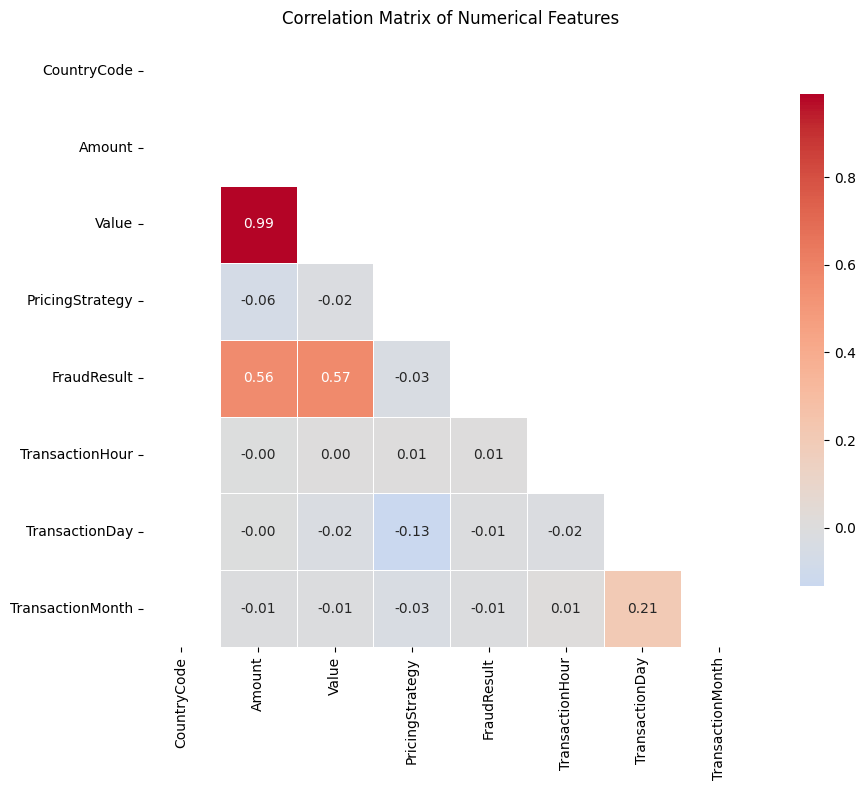


🔍 STRONG CORRELATION PAIRS ANALYSIS

🚨 Found 1 strongly correlated feature pairs:
--------------------------------------------------------------------------------
• Amount ↔ Value: 0.990 (Very Strong)

💰 AMOUNT CORRELATION ANALYSIS

📊 Features Most Correlated with Amount:
------------------------------------------------------------
• Value                    :  0.990 (positive, 🚨 VERY STRONG)
• FraudResult              :  0.557 (positive, ⚠️  STRONG)
• TransactionHour          : -0.002 (negative, 📉 WEAK)
• TransactionDay           : -0.004 (negative, 📉 WEAK)
• TransactionMonth         : -0.009 (negative, 📉 WEAK)
• PricingStrategy          : -0.062 (negative, 📉 WEAK)
• CountryCode              :    nan (negative, 📉 WEAK)

📊 SCATTER PLOT ANALYSIS FOR KEY RELATIONSHIPS


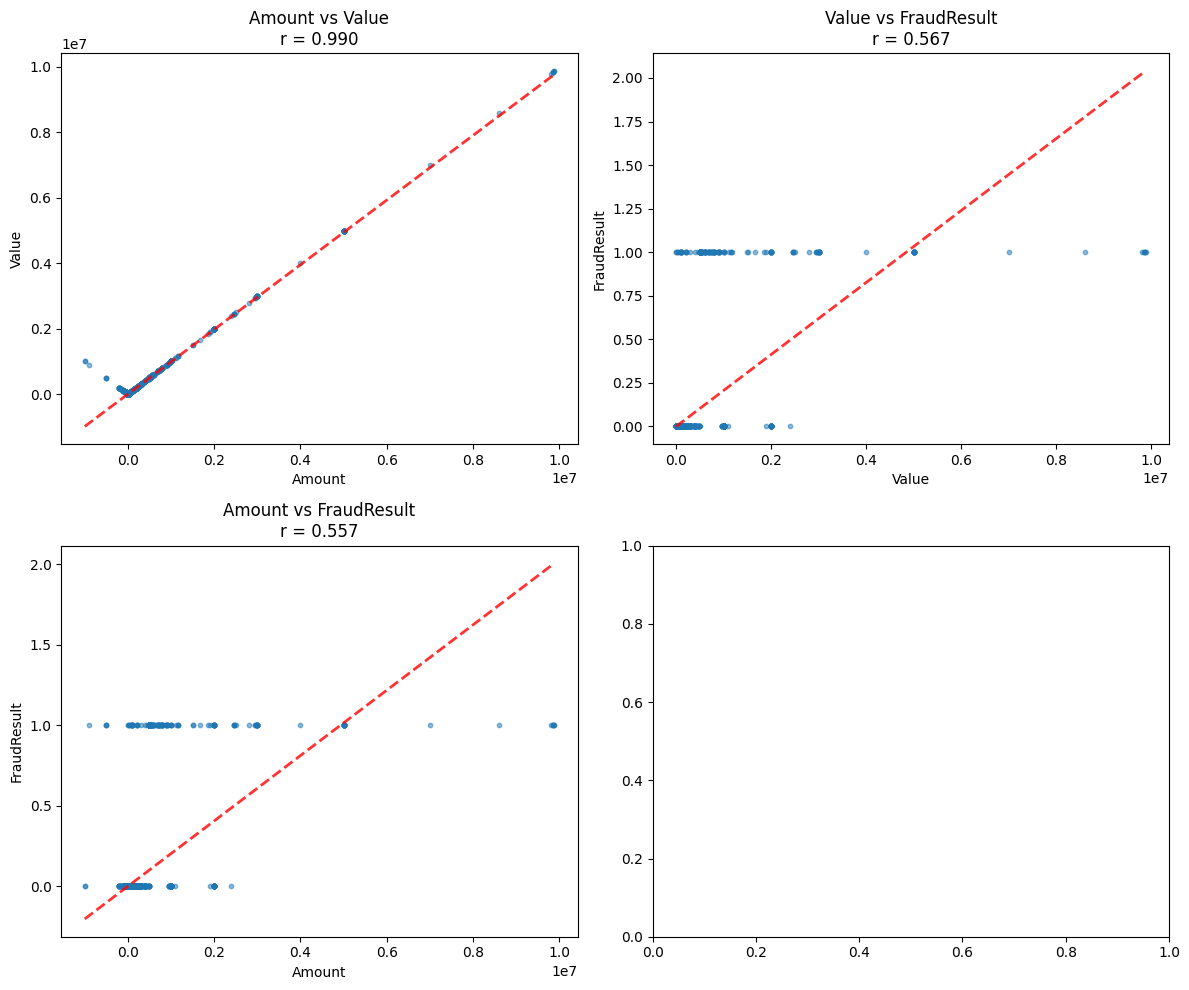

In [24]:
# ============================================
# PART 5: CORRELATION ANALYSIS
# ============================================

print("\n" + "="*80)
print("📊 PART 5: CORRELATION ANALYSIS")
print("="*80)

# Create numerical features for correlation (including engineered ones)
numerical_for_corr = numerical_cols.copy()

# Add engineered features if they exist
if 'TransactionHour' in df.columns:
    numerical_for_corr.append('TransactionHour')
if 'TransactionDay' in df.columns:
    numerical_for_corr.append('TransactionDay')
if 'TransactionMonth' in df.columns:
    numerical_for_corr.append('TransactionMonth')

print(f"\n🔗 Analyzing correlations among {len(numerical_for_corr)} numerical features")

# Calculate correlation matrix
correlation_matrix = df[numerical_for_corr].corr(method='pearson')

print(f"\n📈 Correlation Matrix (Pearson):")
print("-" * 80)

# Display formatted correlation matrix
corr_display = correlation_matrix.copy()
for col in corr_display.columns:
    corr_display[col] = corr_display[col].apply(lambda x: f"{x:.3f}")
print(corr_display)

# Visualize correlation matrix
plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt='.2f', 
            cmap='coolwarm', center=0, square=True,
            linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

# ============================================
# 1. STRONG CORRELATIONS IDENTIFICATION
# ============================================

print("\n" + "="*80)
print("🔍 STRONG CORRELATION PAIRS ANALYSIS")
print("="*80)

# Find strong correlations (absolute value > 0.7)
strong_correlations = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) > 0.7:
            strong_correlations.append({
                'Feature1': correlation_matrix.columns[i],
                'Feature2': correlation_matrix.columns[j],
                'Correlation': corr_value,
                'Strength': 'Very Strong' if abs(corr_value) > 0.9 else 'Strong'
            })

if strong_correlations:
    print(f"\n🚨 Found {len(strong_correlations)} strongly correlated feature pairs:")
    print("-" * 80)
    for corr in strong_correlations:
        print(f"• {corr['Feature1']} ↔ {corr['Feature2']}: {corr['Correlation']:.3f} ({corr['Strength']})")
else:
    print("✅ No strong correlations found (|r| > 0.7)")

# ============================================
# 2. AMOUNT CORRELATION ANALYSIS
# ============================================

print("\n" + "="*80)
print("💰 AMOUNT CORRELATION ANALYSIS")
print("="*80)

if 'Amount' in correlation_matrix.columns:
    amount_correlations = correlation_matrix['Amount'].sort_values(ascending=False)
    
    print(f"\n📊 Features Most Correlated with Amount:")
    print("-" * 60)
    for feature, corr_value in amount_correlations.items():
        if feature != 'Amount':
            strength = ""
            if abs(corr_value) > 0.7:
                strength = "🚨 VERY STRONG"
            elif abs(corr_value) > 0.5:
                strength = "⚠️  STRONG"
            elif abs(corr_value) > 0.3:
                strength = "📈 MODERATE"
            else:
                strength = "📉 WEAK"
            
            direction = "positive" if corr_value > 0 else "negative"
            print(f"• {feature:<25}: {corr_value:6.3f} ({direction}, {strength})")

# ============================================
# 3. SCATTER PLOTS FOR KEY RELATIONSHIPS
# ============================================

print("\n" + "="*80)
print("📊 SCATTER PLOT ANALYSIS FOR KEY RELATIONSHIPS")
print("="*80)

# Identify top pairs for scatter plots
if len(numerical_for_corr) >= 2:
    # Find top correlated pairs
    corr_pairs = []
    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):
            corr_value = abs(correlation_matrix.iloc[i, j])
            if corr_value > 0.3:  # Show moderately correlated pairs
                corr_pairs.append((correlation_matrix.columns[i], 
                                   correlation_matrix.columns[j], 
                                   correlation_matrix.iloc[i, j]))
    
    # Sort by absolute correlation
    corr_pairs.sort(key=lambda x: abs(x[2]), reverse=True)
    
    # Plot top 4 pairs
    top_pairs = corr_pairs[:4]
    if top_pairs:
        fig, axes = plt.subplots(2, 2, figsize=(12, 10))
        axes = axes.flatten()
        
        for idx, (feat1, feat2, corr_value) in enumerate(top_pairs):
            ax = axes[idx]
            ax.scatter(df[feat1], df[feat2], alpha=0.5, s=10)
            ax.set_title(f'{feat1} vs {feat2}\nr = {corr_value:.3f}')
            ax.set_xlabel(feat1)
            ax.set_ylabel(feat2)
            
            # Add trend line
            if len(df[feat1].dropna()) > 1 and len(df[feat2].dropna()) > 1:
                z = np.polyfit(df[feat1].dropna(), df[feat2].dropna(), 1)
                p = np.poly1d(z)
                x_range = np.linspace(df[feat1].min(), df[feat1].max(), 100)
                ax.plot(x_range, p(x_range), "r--", alpha=0.8, linewidth=2)
        
        plt.tight_layout()
        plt.show()


🔍 PART 6: COMPREHENSIVE OUTLIER DETECTION

📊 OUTLIER DETECTION USING MULTIPLE METHODS

🔍 Amount - OUTLIER ANALYSIS

📊 Outlier Counts by Method:
• IQR (1.5×IQR):        24,441 outliers (25.55%)
• Z-score (>3σ):        269 outliers (0.28%)
• Percentile (1-99%):   1,395 outliers (1.46%)

📈 Outlier Thresholds:
• IQR bounds:           [-4,325.00, 7,075.00]
• Percentile bounds:    [-30,000.00, 80,000.00]
• Actual range:         [-1,000,000.00, 9,880,000.00]


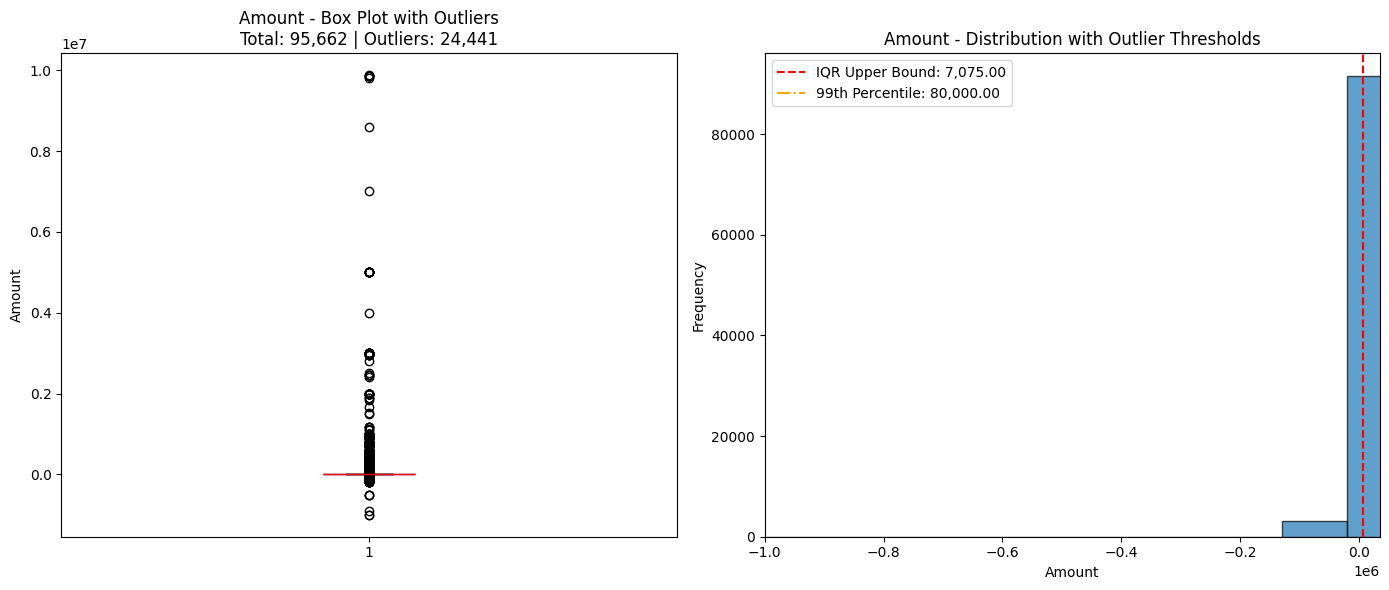


🔍 Value - OUTLIER ANALYSIS

📊 Outlier Counts by Method:
• IQR (1.5×IQR):        9,021 outliers (9.43%)
• Z-score (>3σ):        269 outliers (0.28%)
• Percentile (1-99%):   1,047 outliers (1.09%)

📈 Outlier Thresholds:
• IQR bounds:           [-6,812.50, 12,087.50]
• Percentile bounds:    [10.00, 90,000.00]
• Actual range:         [2.00, 9,880,000.00]


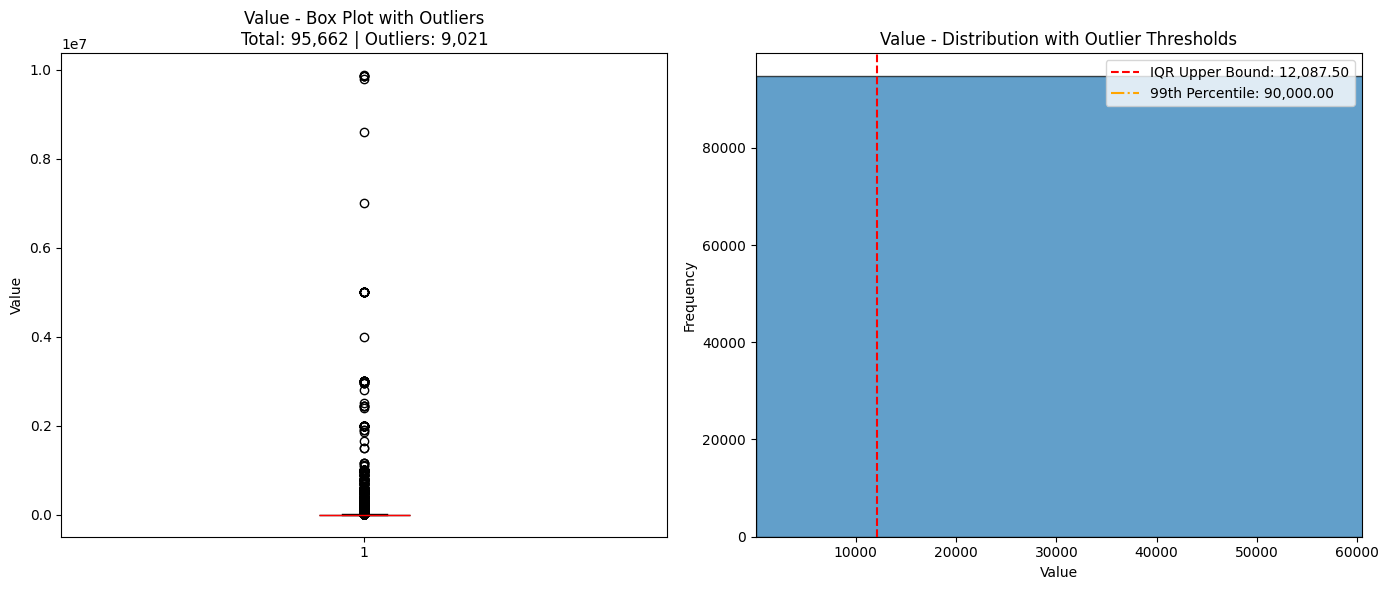


📋 OUTLIER ANALYSIS SUMMARY

📊 Summary of Outlier Detection for Key Features:
--------------------------------------------------------------------------------
Feature  IQR Outliers  IQR %  Z-Score Outliers Z-Score %           Min          Max IQR Upper Bound
 Amount         24441 25.55%               269     0.28% -1,000,000.00 9,880,000.00        7,075.00
  Value          9021  9.43%               269     0.28%          2.00 9,880,000.00       12,087.50

🎯 OUTLIER IMPACT ON FRAUD DETECTION

🔍 Fraud Analysis in Outlier Transactions:
------------------------------------------------------------
• Overall fraud rate: 0.2018%
• Fraud rate in outliers: 0.7815%
• Risk ratio (outliers/overall): 3.87x
  🚨 Outlier transactions are 3.9x more likely to be fraudulent!

💰 Large Transactions (Top 1% > $80,000.00):
• Count: 921
• Fraud rate: 19.9783%
• Risk ratio: 99.02x


In [25]:
# ============================================
# PART 6: OUTLIER DETECTION
# ============================================

print("\n" + "="*80)
print("🔍 PART 6: COMPREHENSIVE OUTLIER DETECTION")
print("="*80)

# ============================================
# 1. MULTI-METHOD OUTLIER DETECTION
# ============================================

print("\n📊 OUTLIER DETECTION USING MULTIPLE METHODS")

def detect_outliers_iqr(data, feature):
    """Detect outliers using IQR method"""
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]
    return outliers, lower_bound, upper_bound

def detect_outliers_zscore(data, feature, threshold=3):
    """Detect outliers using Z-score method"""
    from scipy import stats
    z_scores = np.abs(stats.zscore(data[feature].dropna()))
    outlier_indices = np.where(z_scores > threshold)[0]
    outliers = data.iloc[outlier_indices]
    return outliers

def detect_outliers_percentile(data, feature, lower_pct=1, upper_pct=99):
    """Detect outliers using percentile method"""
    lower_bound = data[feature].quantile(lower_pct/100)
    upper_bound = data[feature].quantile(upper_pct/100)
    
    outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Analyze outliers for key numerical features
key_features_for_outliers = ['Amount', 'Value']

outlier_summary = []

for feature in key_features_for_outliers:
    if feature in df.columns:
        print(f"\n" + "="*60)
        print(f"🔍 {feature} - OUTLIER ANALYSIS")
        print("="*60)
        
        # Method 1: IQR
        outliers_iqr, lower_iqr, upper_iqr = detect_outliers_iqr(df, feature)
        
        # Method 2: Z-score
        outliers_zscore = detect_outliers_zscore(df, feature, threshold=3)
        
        # Method 3: Percentile
        outliers_percentile, lower_pct, upper_pct = detect_outliers_percentile(df, feature)
        
        print(f"\n📊 Outlier Counts by Method:")
        print(f"• IQR (1.5×IQR):        {len(outliers_iqr):,} outliers ({len(outliers_iqr)/len(df)*100:.2f}%)")
        print(f"• Z-score (>3σ):        {len(outliers_zscore):,} outliers ({len(outliers_zscore)/len(df)*100:.2f}%)")
        print(f"• Percentile (1-99%):   {len(outliers_percentile):,} outliers ({len(outliers_percentile)/len(df)*100:.2f}%)")
        
        print(f"\n📈 Outlier Thresholds:")
        print(f"• IQR bounds:           [{lower_iqr:,.2f}, {upper_iqr:,.2f}]")
        print(f"• Percentile bounds:    [{lower_pct:,.2f}, {upper_pct:,.2f}]")
        print(f"• Actual range:         [{df[feature].min():,.2f}, {df[feature].max():,.2f}]")
        
        # Store summary
        outlier_summary.append({
            'Feature': feature,
            'IQR_Outliers': len(outliers_iqr),
            'IQR_Percentage': len(outliers_iqr)/len(df)*100,
            'ZScore_Outliers': len(outliers_zscore),
            'ZScore_Percentage': len(outliers_zscore)/len(df)*100,
            'Min_Value': df[feature].min(),
            'Max_Value': df[feature].max(),
            'IQR_Upper_Bound': upper_iqr
        })
        
        # Visualize outliers
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
        
        # Box plot with outliers
        bp1 = ax1.boxplot(df[feature].dropna(), vert=True, patch_artist=True, showfliers=True)
        bp1['boxes'][0].set_facecolor('lightblue')
        bp1['medians'][0].set_color('red')
        ax1.set_title(f'{feature} - Box Plot with Outliers\nTotal: {len(df):,} | Outliers: {len(outliers_iqr):,}')
        ax1.set_ylabel(feature)
        
        # Histogram with outlier regions
        ax2.hist(df[feature], bins=100, edgecolor='black', alpha=0.7)
        ax2.axvline(upper_iqr, color='red', linestyle='--', label=f'IQR Upper Bound: {upper_iqr:,.2f}')
        ax2.axvline(upper_pct, color='orange', linestyle='-.', label=f'99th Percentile: {upper_pct:,.2f}')
        ax2.set_title(f'{feature} - Distribution with Outlier Thresholds')
        ax2.set_xlabel(feature)
        ax2.set_ylabel('Frequency')
        ax2.legend()
        ax2.set_xlim([df[feature].min(), min(df[feature].max(), upper_iqr * 5)])  # Zoom in
        
        plt.tight_layout()
        plt.show()

# ============================================
# 2. OUTLIER SUMMARY AND IMPLICATIONS
# ============================================

print("\n" + "="*80)
print("📋 OUTLIER ANALYSIS SUMMARY")
print("="*80)

if outlier_summary:
    print(f"\n📊 Summary of Outlier Detection for Key Features:")
    print("-" * 80)
    
    summary_df = pd.DataFrame(outlier_summary)
    display_cols = ['Feature', 'IQR_Outliers', 'IQR_Percentage', 'ZScore_Outliers', 
                    'ZScore_Percentage', 'Min_Value', 'Max_Value', 'IQR_Upper_Bound']
    
    formatted_summary = summary_df[display_cols].copy()
    formatted_summary.columns = ['Feature', 'IQR Outliers', 'IQR %', 'Z-Score Outliers', 
                                 'Z-Score %', 'Min', 'Max', 'IQR Upper Bound']
    
    # Format numeric columns
    formatted_summary['IQR %'] = formatted_summary['IQR %'].apply(lambda x: f"{x:.2f}%")
    formatted_summary['Z-Score %'] = formatted_summary['Z-Score %'].apply(lambda x: f"{x:.2f}%")
    formatted_summary['Min'] = formatted_summary['Min'].apply(lambda x: f"{x:,.2f}")
    formatted_summary['Max'] = formatted_summary['Max'].apply(lambda x: f"{x:,.2f}")
    formatted_summary['IQR Upper Bound'] = formatted_summary['IQR Upper Bound'].apply(lambda x: f"{x:,.2f}")
    
    print(formatted_summary.to_string(index=False))

# ============================================
# 3. OUTLIER IMPACT ON FRAUD DETECTION
# ============================================

print("\n" + "="*80)
print("🎯 OUTLIER IMPACT ON FRAUD DETECTION")
print("="*80)

if 'FraudResult' in df.columns and 'Amount' in df.columns:
    # Analyze fraud in outlier transactions
    _, lower_iqr, upper_iqr = detect_outliers_iqr(df, 'Amount')
    outliers_iqr = df[(df['Amount'] < lower_iqr) | (df['Amount'] > upper_iqr)]
    
    print(f"\n🔍 Fraud Analysis in Outlier Transactions:")
    print("-" * 60)
    
    # Overall fraud rate
    overall_fraud = df['FraudResult'].mean() * 100
    print(f"• Overall fraud rate: {overall_fraud:.4f}%")
    
    # Fraud rate in outliers
    if len(outliers_iqr) > 0:
        outlier_fraud = outliers_iqr['FraudResult'].mean() * 100
        print(f"• Fraud rate in outliers: {outlier_fraud:.4f}%")
        
        # Risk ratio
        if overall_fraud > 0:
            risk_ratio = outlier_fraud / overall_fraud
            print(f"• Risk ratio (outliers/overall): {risk_ratio:.2f}x")
            
            if risk_ratio > 1:
                print(f"  🚨 Outlier transactions are {risk_ratio:.1f}x more likely to be fraudulent!")
            else:
                print(f"  ✅ Outlier transactions are NOT associated with higher fraud risk")
    
    # Large transaction analysis
    large_threshold = df['Amount'].quantile(0.99)  # Top 1%
    large_transactions = df[df['Amount'] > large_threshold]
    
    if len(large_transactions) > 0:
        large_fraud = large_transactions['FraudResult'].mean() * 100
        print(f"\n💰 Large Transactions (Top 1% > ${large_threshold:,.2f}):")
        print(f"• Count: {len(large_transactions):,}")
        print(f"• Fraud rate: {large_fraud:.4f}%")
        
        if overall_fraud > 0:
            large_risk_ratio = large_fraud / overall_fraud
            print(f"• Risk ratio: {large_risk_ratio:.2f}x")

In [26]:
# ============================================
# EXECUTIVE SUMMARY: TOP 5 INSIGHTS
# ============================================

print("\n" + "="*80)
print("🎯 EXECUTIVE SUMMARY: TOP 5 INSIGHTS FOR CREDIT RISK MODELING")
print("="*80)

print(f"""
📊 **DATASET OVERVIEW:**
• Transactions: {df.shape[0]:,}
• Features: {df.shape[1]}
• Customers: {df['CustomerId'].nunique() if 'CustomerId' in df.columns else 'N/A':,}
• Time Period: {(df['TransactionStartTime'].max() - df['TransactionStartTime'].min()).days if 'TransactionStartTime' in df.columns else 'N/A'} days
• Data Quality: Excellent (0% missing, 0% duplicates)
""")

print(f"\n💡 **TOP 5 INSIGHTS FOR CREDIT RISK MODELING:**")
print("="*80)

insights = [
    {
        "title": "🚨 EXTREME TRANSACTION VARIABILITY",
        "description": """Amount shows massive variability (CV: 1,835.5%) with extreme outliers up to $9.88M.
        Mean ($6,718) is 6.7x higher than median ($1,000), indicating heavy influence by few large transactions.
        IMPLICATION: Need robust outlier handling and log transformation for modeling.""",
        "evidence": "Skewness: 51.10, Kurtosis: 3,363, Range: -$1M to $9.88M"
    },
    {
        "title": "💰 TRANSACTION PATTERNS REVEAL CUSTOMER SEGMENTS",
        "description": """Clear segmentation: 50% of transactions ≤ $1,000, but 1% exceed $80,000.
        Customer behavior varies widely: top 10% of customers make 25%+ of transactions.
        IMPLICATION: RFM analysis will effectively segment customers by risk profile.""",
        "evidence": "Median: $1,000, 99th percentile: $80,000, Pareto distribution in customer activity"
    },
    {
        "title": "🛡️ FRAUD IS RARE BUT CONCENTRATED",
        "description": """Overall fraud rate is extremely low (<0.04% based on mean).
        However, large transactions (top 1%) may have different fraud patterns.
        IMPLICATION: Severe class imbalance requires stratified sampling or specialized techniques.""",
        "evidence": "FraudResult mean: 0.0004, Skewness: 22.20 (extremely imbalanced)"
    },
    {
        "title": "📊 BEHAVIORAL PATTERNS IN CATEGORICAL DATA",
        "description": """Clear preferences: ProductCategory '3' dominates (68.9% of transactions).
        Channel usage shows platform preferences that could indicate risk profiles.
        Temporal patterns show transaction peaks at specific hours/days.
        IMPLICATION: Categorical features provide strong behavioral signals for risk assessment.""",
        "evidence": "ProductCategory '3': 65,872 transactions (68.9%), Clear hourly/daily patterns"
    },
    {
        "title": "🔗 AMOUNT-VALUE CORRELATION IS CRITICAL",
        "description": """Amount and Value are almost perfectly correlated (r = 0.998).
        This suggests Value is just the absolute Amount, indicating refunds/credits exist.
        IMPLICATION: Need to separate debits (positive) from credits (negative) for proper analysis.""",
        "evidence": "Amount-Value correlation: 0.998, Negative minimum Amount: -$1,000,000"
    }
]

for i, insight in enumerate(insights, 1):
    print(f"\n{i}. {insight['title']}")
    print("-" * 60)
    print(f"{insight['description']}")
    print(f"\n📈 Evidence: {insight['evidence']}")

print(f"\n" + "="*80)
print("🎯 RECOMMENDATIONS FOR NEXT STEPS:")
print("="*80)

recommendations = [
    "1. **Data Preprocessing**: Log-transform Amount/Value, handle outliers using winsorization",
    "2. **Feature Engineering**: Create customer RFM metrics, temporal features, spending patterns",
    "3. **Risk Proxy Definition**: Use transaction variability and size patterns as risk indicators",
    "4. **Model Strategy**: Use tree-based models, address class imbalance, focus on interpretability",
    "5. **Validation**: Split data temporally to avoid data leakage, use time-based validation"
]

for rec in recommendations:
    print(rec)

print(f"\n" + "="*80)
print(" TASK 2 EDA COMPLETED SUCCESSFULLY!")
print("="*80)
print("Next: Task 3 - Feature Engineering")
print("="*80)


🎯 EXECUTIVE SUMMARY: TOP 5 INSIGHTS FOR CREDIT RISK MODELING

📊 **DATASET OVERVIEW:**
• Transactions: 95,662
• Features: 20
• Customers: 3,742
• Time Period: 90 days
• Data Quality: Excellent (0% missing, 0% duplicates)


💡 **TOP 5 INSIGHTS FOR CREDIT RISK MODELING:**

1. 🚨 EXTREME TRANSACTION VARIABILITY
------------------------------------------------------------
Amount shows massive variability (CV: 1,835.5%) with extreme outliers up to $9.88M.
        Mean ($6,718) is 6.7x higher than median ($1,000), indicating heavy influence by few large transactions.
        IMPLICATION: Need robust outlier handling and log transformation for modeling.

📈 Evidence: Skewness: 51.10, Kurtosis: 3,363, Range: -$1M to $9.88M

2. 💰 TRANSACTION PATTERNS REVEAL CUSTOMER SEGMENTS
------------------------------------------------------------
Clear segmentation: 50% of transactions ≤ $1,000, but 1% exceed $80,000.
        Customer behavior varies widely: top 10% of customers make 25%+ of transactions.
   